In [505]:
#automatically reload stuff
%reload_ext autoreload
%autoreload 2
from SymptomPreprocessing import *
from SpatialPreprocessing import *
import Preprocessing as P
import Cluster
import Metrics
import re
import RPorts
import Utils
from AucComp import delong
from warnings import simplefilter

from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, GradientBoostingRegressor, AdaBoostRegressor, RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.decomposition import PCA
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import f_classif, f_regression, mutual_info_regression, mutual_info_classif
from sklearn.metrics import accuracy_score,f1_score, auc, precision_recall_fscore_support, matthews_corrcoef, roc_auc_score, recall_score, precision_score, roc_curve
from datetime import datetime
import statsmodels.api as sm
from scipy.stats import chi2
import seaborn as sns
import joblib

simplefilter(action='ignore')
pd.set_option('display.max_rows', 1000)

In [2]:
def timestamp():
    return datetime.now().strftime('%Y%d%H%M%S%f')
for i in range(10):
    print(timestamp())

202231133332249799
202231133332249863
202231133332249882
202231133332249896
202231133332249973
202231133332250042
202231133332250122
202231133332250195
202231133332250364
202231133332250389


In [3]:
rds = RadDataset()
rds.get_value_array(rds.dvh_df.columns,as_df=True)

spellchecking...
renaming things
filtering pateints
adding nan values for missing organs
adding histograms
176.0 91.77084266874341 406.1887464658043
264.0 109.22534647050192 407.1108350538819


Esophagus_D80  Esophagus_D5  Esophagus_D75  Esophagus_V35  \
id                                                                 
2.0        29.187500     53.218750      31.812500      59.875000   
6.0         6.699219     46.125000      17.093750      62.125000   
7.0         5.000000     38.687500       6.578125      20.671875   
8.0         6.691406     32.781250       7.281250       0.000000   
9.0        22.515625     54.468750      24.453125      45.406250   
10.0        7.660156     45.718750      10.156250      41.500000   
11.0        6.730469     26.812500       6.921875       0.000000   
12.0        0.700195      3.900391       0.770020       0.000000   
13.0       14.031250     42.656250      28.234375      69.500000   
15.0       31.375000     45.843750      33.312500      70.250000   
16.0        0.020004     26.734375       6.160156       0.000000   
18.0       22.515625     54.468750      24.453125      45.406250   
19.0        4.679688     39.531250       6.500000      30.765625   
21.0       23.375000     45.968750      30.921875      70.500000   
22.0       21.265625     47.218750      32.906250      72.937500   
23.0       30.796875     43.125000      33.843750      71.500000   
24.0        6.351562     38.750000       9.570312      14.093750   
25.0        0.020004     27.375000       4.109375       0.000000   
28.0       22.515625     54.468750      24.453125      45.406250   
29.0       27.718750     40.468750      30.906250      60.281250   
31.0       22.515625     54.468750      24.453125      45.406250   
32.0        5.089844     22.859375       5.359375       0.000000   
34.0       22.515625     54.468750      24.453125      45.406250   
35.0       22.515625     54.468750      24.453125      45.406250   
37.0        9.382812     40.031250      14.101562      15.031250   
38.0        1.179688     11.210938       1.360352       0.000000   
39.0        9.531250     37.593750      15.203125      40.250000   
40.0        7.039062     40.062500       8.093750      31.718750   
41.0        2.380859     34.625000       3.140625       4.582031   
42.0        4.679688     38.968750       5.718750      14.148438   
43.0       20.625000     55.375000      22.765625      48.875000   
44.0        0.020004     26.796875       5.281250       0.000000   
45.0       22.515625     54.468750      24.453125      45.406250   
46.0       22.515625     54.468750      24.453125      45.406250   
47.0        3.130859     40.281250       4.359375      25.609375   
48.0       20.843750     48.937500      22.437500      49.218750   
49.0       22.515625     54.468750      24.453125      45.406250   
50.0       22.515625     54.468750      24.453125      45.406250   
51.0       11.687500     24.484375      14.718750       0.000000   
52.0        7.628906     37.562500       7.851562      23.390625   
53.0        6.921875     32.625000      12.929688       1.168945   
54.0        0.959961     24.703125       2.150391       0.000000   
56.0        0.020004     55.656250       0.020004      39.375000   
57.0        2.699219     24.625000       3.220703       0.000000   
58.0       22.515625     54.468750      24.453125      45.406250   
59.0       30.609375     40.937500      31.703125      62.281250   
60.0       11.679688     33.531250      12.859375       2.640625   
61.0       16.703125     50.250000      23.375000      63.312500   
62.0        0.340088     11.859375       0.529785       0.000000   
65.0        3.330078     31.875000       3.980469       1.615234   
67.0        4.359375     40.781250       5.910156      22.328125   
68.0        9.539062     36.312500      10.398438       8.835938   
69.0       12.179688     36.875000      14.226562      10.062500   
71.0       23.734375     38.843750      28.765625      46.093750   
72.0       22.515625     54.468750      24.453125      45.406250   
73.0       22.515625     54.468750      24.453125      45.406250   
76.0       22.515625     54.468750      24.453125      45.40625

In [205]:
def add_dose_limits(df,organ_list=None):
    #dose limits as binary values from https://applications.emro.who.int/imemrf/Rep_Radiother_Oncol/Rep_Radiother_Oncol_2013_1_1_35_48.pdf
    #not inlcudeing other stuff like eyes at this time
    #also, my max dose is weird so I'm using V10 for that because I feel like that makes sense
    #using the 
    if organ_list is None:
        organ_list = Const.organ_list[:]
    df = df.copy()
    original_cols = set(df.columns)
    getval = lambda organ,param: df[param].apply(lambda x: x[organ_list.index(organ)])
    get_lr_val = lambda organ,param: np.maximum(getval('Lt_'+organ,param),getval('Rt_'+organ,param))
    
    maxdose_var = 'max_dose'
    #symptomatic necrosis
    df['Brainstem_limit'] = (getval('Brainstem','D2') > 59) | (getval('Brainstem','D99') > 54)
    
    #myelopathy
    df['Spinal_Cord_limit'] = getval('Spinal_Cord',maxdose_var) > 50
    
    #xerostomia. >25 for 1 or >20 for both
    df['Parotid_Gland_limit'] = (get_lr_val('Parotid_Gland','mean_dose') > 20) | (getval('Lt_Parotid_Gland','mean_dose') > 25) | (getval('Rt_Parotid_Gland','mean_dose') > 25)
    
    #there is 50 for PEG tube and 60 for aspiration so i'll do 50
    for o in ['IPC','MPC',"SPC"]:
        df[o+"_limit"] = getval(o,'mean_dose') > 50
        df[o+"_limit2"] = getval(o,'mean_dose') > 60
    
    #ORN?
    df['Mandible_limit'] = getval('Mandible',maxdose_var) > 70
    
    #edema
    df['Larynx_limit'] = getval('Larynx','V50') > 27
    
    #Nerve damage
    df['Brachial_Plexus_limit'] = get_lr_val('Brachial_Plexus',maxdose_var) > 60
    
    #Esophagitus
    elimits = [('V35',50),('V50',40),('V70',20),('V60',30)]
    df['Esophagus_limit'] = np.stack([(getval('Esophagus',v) > lim) for v,lim in elimits]).sum(axis=0) > 0
    
#     print(df[[c for c in df.columns if  c not in original_cols]].sum())
    return df

def rds_to_df(rds,use_lstm=False):
    sd_df = P.get_merged_symp_dose_df(rds,roll_up=True,use_lstm=use_lstm)
#     sd_df = P.get_symptoms_max(sd_df)
    sd_df =  P.add_sd_dose_clusters(sd_df)
#     sd_df = P.add_sd_symptom_clusters(sd_df)
    sd_df = add_dose_limits(sd_df)
    return sd_df

sddf = rds_to_df(rds)
sddf = P.add_sd_dose_clusters(sddf)
sddf

before drop count 823
after drop count 537
error (%) 0.8223393833485576
[('severe_6wk_symptoms', 0.00931098696461825), ('severe_late_symptoms', 0.0148975791433892), ('moderate_6wk_symptoms', 0.0521415270018622), ('moderate_late_symptoms', 0.04655493482309125), ('mild_6wk_symptoms', 0.19553072625698323), ('mild_late_symptoms', 0.16945996275605213)]
dose ids: 484 syptom ids: 537 merged ids: 350


D10  \
id                                                       
7    [37.625, 37.15625, 66.3125, 60.3125, 49.4375, ...   
8    [32.15625, 32.0625, 65.375, 56.6875, 22.5, 31....   
9    [51.4375, 27.515625, 51.4375, 51.4375, 18.6875...   
10   [44.21875, 35.625, 64.75, 55.9375, 52.84375, 5...   
11   [26.15625, 31.984375, 57.125, 45.40625, 29.265...   
13   [42.21875, 29.625, 60.46875, 48.6875, 19.5, 41...   
15   [44.90625, 33.28125, 57.71875, 47.75, 43.625, ...   
16   [24.9375, 32.28125, 56.84375, 52.625, 39.09375...   
18   [51.4375, 29.78125, 51.4375, 51.4375, 30.5625,...   
22   [45.4375, 35.125, 71.375, 64.8125, 62.78125, 6...   
23   [42.875, 36.53125, 57.6875, 47.84375, 18.8125,...   
25   [25.875, 26.6875, 55.375, 56.0, 34.78125, 33.5...   
28   [51.4375, 25.375, 51.4375, 6.08984375, 35.25, ...   
29   [40.21875, 34.96875, 52.375, 50.03125, 31.5, 4...   
31   [51.4375, 24.140625, 51.4375, 51.4375, 50.875,...   
34   [51.4375, 25.265625, 51.4375, 51.4375, 48.3437...   
37   [37.46875, 34.8125, 58.28125, 12.1171875, 36.1...   
38   [7.19921875, 32.25, 47.78125, 1.8203125, 7.230...   
39   [36.9375, 34.5625, 55.6875, 57.5625, 40.875, 5...   
42   [36.5, 32.96875, 54.1875, 51.625, 42.46875, 46...   
43   [54.96875, 30.4375, 59.0625, 64.5, 56.03125, 5...   
44   [25.421875, 29.140625, 57.46875, 52.53125, 41....   
45   [51.4375, 34.90625, 55.0, 51.3125, 11.578125, ...   
46   [51.4375, 34.0625, 55.0, 49.21875, 20.4375, 37...   
47   [37.96875, 33.6875, 70.375, 50.9375, 40.1875, ...   
48   [48.1875, 35.75, 59.53125, 54.28125, 33.71875,...   
49   [51.4375, 37.90625, 48.4375, 48.1875, 41.53125...   
50   [51.4375, 30.59375, 70.25, 58.125, 57.40625, 6...   
51   [22.859375, 29.546875, 67.25, 51.1875, 42.125,...   
53   [30.8125, 29.109375, 62.6875, 51.875, 35.0625,...   
54   [20.9375, 28.3125, 70.8125, 54.3125, 47.8125, ...   
56   [53.4375, 31.65625, 57.40625, 57.03125, 59.0, ...   
57   [23.234375, 22.734375, 63.375, 54.09375, 55.68...   
58   [51.4375, 35.0625, 57.0, 47.90625, 17.859375, ...   
60   [31.625, 37.375, 57.65625, 57.875, 35.4375, 41...   
61   [48.9375, 37.65625, 71.0625, 54.8125, 51.8125,...   
62   [10.8125, 30.96875, 60.75, 58.875, 41.4375, 59...   
65   [29.734375, 28.515625, 51.71875, 51.96875, 43....   
69   [35.0, 27.640625, 70.4375, 57.96875, 51.8125, ...   
72   [51.4375, 30.203125, 67.5625, 56.84375, 72.312...   
73   [51.4375, 36.59375, 51.4375, 51.4375, 41.375, ...   
77   [52.53125, 30.0, 70.625, 57.125, 55.75, 60.5, ...   
78   [37.875, 24.375, 47.53125, 46.8125, 36.1875, 4...   
79   [37.0625, 31.4375, 66.4375, 57.90625, 50.84375...   
80   [17.265625, 32.625, 60.25, 45.8125, 20.546875,...   
82   [2.859375, 29.734375, 50.46875, 49.65625, 9.29...   
85   [51.4375, 30.71875, 51.4375, 51.4375, 4.488281...   
86   [25.484375, 33.40625, 60.90625, 52.84375, 36.3...   
91   [31.875, 24.15625, 64.25, 53.65625, 35.625, 37...   
92   [14.453125, 19.65625, 55.15625, 50.96875, 59.6...   
93   [49.875, 33.90625, 71.8125, 71.1875, 62.0, 66....   
94   [0.0200042724609375, 33.96875, 0.0200042724609...   
95   [33.40625, 20.5625, 55.59375, 7.46875, 39.2812...   
96   [23.6875, 31.6875, 58.09375, 47.09375, 15.3125...   
97   [38.625, 33.78125, 57.5, 49.3125, 39.78125, 37...   
98   [41.78125, 34.09375, 62.65625, 49.125, 27.0312...   
99   [26.296875, 25.40625, 54.1875, 45.65625, 37.25...   
101  [42.90625, 33.34375, 66.8125, 57.8125, 58.375,...   
102  [54.625, 34.28125, 62.15625, 60.625, 50.9375, ...   
104  [38.78125, 35.96875, 61.75, 56.96875, 52.15625...   
105  [27.171875, 29.921875, 46.28125, 44.0625, 42.8...   
107  [30.34375, 30.34375, 56.46875, 48.125, 28.2968...   
109  [21.453125, 29.203125, 61.875, 54.0625, 35.875...   
110  [37.53125, 27.265625, 64.25, 57.8125, 56.6875,...   
111  [37.40625, 35.625, 65.625, 55.59375, 11.523437...   
112  [26.4375, 35.875, 51.46875, 48.5625, 18.25, 32...   
116  [42.34375, 36.53125, 55.03125, 56.71875, 13.68...   
117  [38.6875, 30.015625, 53.8125, 53.0, 15.96093

In [478]:
#seperate version using all the patients using the data imputed by guadalupe
lstmdf = rds_to_df(rds,use_lstm=True)
lstmdf = P.add_sd_dose_clusters(lstmdf)
lstmdf

before drop count 823
after drop count 823
[('severe_6wk_symptoms', 0.013365735115431349), ('severe_late_symptoms', 0.018226002430133656), ('moderate_6wk_symptoms', 0.05103280680437424), ('moderate_late_symptoms', 0.05710814094775213), ('mild_6wk_symptoms', 0.21142162818955043), ('mild_late_symptoms', 0.17618469015795868)]
dose ids: 484 syptom ids: 823 merged ids: 484


D10  \
id                                                       
2    [51.625, 26.890625, 56.1875, 53.625, 53.75, 57...   
6    [44.96875, 26.40625, 61.71875, 56.78125, 55.18...   
7    [37.625, 37.15625, 66.3125, 60.3125, 49.4375, ...   
8    [32.15625, 32.0625, 65.375, 56.6875, 22.5, 31....   
9    [51.4375, 27.515625, 51.4375, 51.4375, 18.6875...   
10   [44.21875, 35.625, 64.75, 55.9375, 52.84375, 5...   
11   [26.15625, 31.984375, 57.125, 45.40625, 29.265...   
12   [3.279296875, 34.4375, 49.25, 1.7197265625, 7....   
13   [42.21875, 29.625, 60.46875, 48.6875, 19.5, 41...   
15   [44.90625, 33.28125, 57.71875, 47.75, 43.625, ...   
16   [24.9375, 32.28125, 56.84375, 52.625, 39.09375...   
18   [51.4375, 29.78125, 51.4375, 51.4375, 30.5625,...   
19   [39.125, 33.09375, 62.5, 54.96875, 33.3125, 36...   
21   [44.59375, 39.9375, 54.6875, 52.84375, 44.8437...   
22   [45.4375, 35.125, 71.375, 64.8125, 62.78125, 6...   
23   [42.875, 36.53125, 57.6875, 47.84375, 18.8125,...   
24   [37.1875, 35.03125, 67.9375, 56.40625, 47.3125...   
25   [25.875, 26.6875, 55.375, 56.0, 34.78125, 33.5...   
28   [51.4375, 25.375, 51.4375, 6.08984375, 35.25, ...   
29   [40.21875, 34.96875, 52.375, 50.03125, 31.5, 4...   
31   [51.4375, 24.140625, 51.4375, 51.4375, 50.875,...   
32   [19.359375, 34.28125, 53.78125, 53.375, 43.812...   
34   [51.4375, 25.265625, 51.4375, 51.4375, 48.3437...   
35   [51.4375, 51.4375, 51.4375, 51.4375, 51.4375, ...   
37   [37.46875, 34.8125, 58.28125, 12.1171875, 36.1...   
38   [7.19921875, 32.25, 47.78125, 1.8203125, 7.230...   
39   [36.9375, 34.5625, 55.6875, 57.5625, 40.875, 5...   
40   [39.5, 33.625, 53.4375, 49.875, 25.046875, 40....   
41   [32.15625, 30.84375, 68.0, 59.53125, 50.5, 53....   
42   [36.5, 32.96875, 54.1875, 51.625, 42.46875, 46...   
43   [54.96875, 30.4375, 59.0625, 64.5, 56.03125, 5...   
44   [25.421875, 29.140625, 57.46875, 52.53125, 41....   
45   [51.4375, 34.90625, 55.0, 51.3125, 11.578125, ...   
46   [51.4375, 34.0625, 55.0, 49.21875, 20.4375, 37...   
47   [37.96875, 33.6875, 70.375, 50.9375, 40.1875, ...   
48   [48.1875, 35.75, 59.53125, 54.28125, 33.71875,...   
49   [51.4375, 37.90625, 48.4375, 48.1875, 41.53125...   
50   [51.4375, 30.59375, 70.25, 58.125, 57.40625, 6...   
51   [22.859375, 29.546875, 67.25, 51.1875, 42.125,...   
52   [36.75, 33.0625, 61.1875, 59.6875, 45.5625, 48...   
53   [30.8125, 29.109375, 62.6875, 51.875, 35.0625,...   
54   [20.9375, 28.3125, 70.8125, 54.3125, 47.8125, ...   
56   [53.4375, 31.65625, 57.40625, 57.03125, 59.0, ...   
57   [23.234375, 22.734375, 63.375, 54.09375, 55.68...   
58   [51.4375, 35.0625, 57.0, 47.90625, 17.859375, ...   
59   [40.65625, 34.25, 45.6875, 45.46875, 28.6875, ...   
60   [31.625, 37.375, 57.65625, 57.875, 35.4375, 41...   
61   [48.9375, 37.65625, 71.0625, 54.8125, 51.8125,...   
62   [10.8125, 30.96875, 60.75, 58.875, 41.4375, 59...   
65   [29.734375, 28.515625, 51.71875, 51.96875, 43....   
67   [38.90625, 33.0, 69.25, 58.25, 38.28125, 51.65...   
68   [34.6875, 36.28125, 57.71875, 57.78125, 47.75,...   
69   [35.0, 27.640625, 70.4375, 57.96875, 51.8125, ...   
71   [38.3125, 36.53125, 58.15625, 47.875, 19.21875...   
72   [51.4375, 30.203125, 67.5625, 56.84375, 72.312...   
73   [51.4375, 36.59375, 51.4375, 51.4375, 41.375, ...   
76   [51.4375, 33.34375, 51.4375, 51.4375, 49.84375...   
77   [52.53125, 30.0, 70.625, 57.125, 55.75, 60.5, ...   
78   [37.875, 24.375, 47.53125, 46.8125, 36.1875, 4...   
79   [37.0625, 31.4375, 66.4375, 57.90625, 50.84375...   
80   [17.265625, 32.625, 60.25, 45.8125, 20.546875,...   
81   [51.4375, 35.625, 51.34375, 10.3125, 8.6484375...   
82   [2.859375, 29.734375, 50.46875, 49.65625, 9.29...   
84   [51.4375, 30.1875, 51.4375, 51.4375, 53.03125,...   
85   [51.4375, 30.71875, 51.4375, 51.4375, 4.488281...   
86   [25.484375, 33.40625, 60.90625, 52.84375, 36.3...   
89   [40.0, 21.40625, 58.0625, 53.71875, 42.3125, 4...   
91   [31.875, 24.15625, 64.25, 53.65625, 35.625, 

In [602]:
#version with missing baseline drymouth removed
lstmdf2 = lstmdf.loc[sddf.index]
lstmdf2

D10  \
id                                                       
7    [37.625, 37.15625, 66.3125, 60.3125, 49.4375, ...   
8    [32.15625, 32.0625, 65.375, 56.6875, 22.5, 31....   
9    [51.4375, 27.515625, 51.4375, 51.4375, 18.6875...   
10   [44.21875, 35.625, 64.75, 55.9375, 52.84375, 5...   
11   [26.15625, 31.984375, 57.125, 45.40625, 29.265...   
13   [42.21875, 29.625, 60.46875, 48.6875, 19.5, 41...   
15   [44.90625, 33.28125, 57.71875, 47.75, 43.625, ...   
16   [24.9375, 32.28125, 56.84375, 52.625, 39.09375...   
18   [51.4375, 29.78125, 51.4375, 51.4375, 30.5625,...   
22   [45.4375, 35.125, 71.375, 64.8125, 62.78125, 6...   
23   [42.875, 36.53125, 57.6875, 47.84375, 18.8125,...   
25   [25.875, 26.6875, 55.375, 56.0, 34.78125, 33.5...   
28   [51.4375, 25.375, 51.4375, 6.08984375, 35.25, ...   
29   [40.21875, 34.96875, 52.375, 50.03125, 31.5, 4...   
31   [51.4375, 24.140625, 51.4375, 51.4375, 50.875,...   
34   [51.4375, 25.265625, 51.4375, 51.4375, 48.3437...   
37   [37.46875, 34.8125, 58.28125, 12.1171875, 36.1...   
38   [7.19921875, 32.25, 47.78125, 1.8203125, 7.230...   
39   [36.9375, 34.5625, 55.6875, 57.5625, 40.875, 5...   
42   [36.5, 32.96875, 54.1875, 51.625, 42.46875, 46...   
43   [54.96875, 30.4375, 59.0625, 64.5, 56.03125, 5...   
44   [25.421875, 29.140625, 57.46875, 52.53125, 41....   
45   [51.4375, 34.90625, 55.0, 51.3125, 11.578125, ...   
46   [51.4375, 34.0625, 55.0, 49.21875, 20.4375, 37...   
47   [37.96875, 33.6875, 70.375, 50.9375, 40.1875, ...   
48   [48.1875, 35.75, 59.53125, 54.28125, 33.71875,...   
49   [51.4375, 37.90625, 48.4375, 48.1875, 41.53125...   
50   [51.4375, 30.59375, 70.25, 58.125, 57.40625, 6...   
51   [22.859375, 29.546875, 67.25, 51.1875, 42.125,...   
53   [30.8125, 29.109375, 62.6875, 51.875, 35.0625,...   
54   [20.9375, 28.3125, 70.8125, 54.3125, 47.8125, ...   
56   [53.4375, 31.65625, 57.40625, 57.03125, 59.0, ...   
57   [23.234375, 22.734375, 63.375, 54.09375, 55.68...   
58   [51.4375, 35.0625, 57.0, 47.90625, 17.859375, ...   
60   [31.625, 37.375, 57.65625, 57.875, 35.4375, 41...   
61   [48.9375, 37.65625, 71.0625, 54.8125, 51.8125,...   
62   [10.8125, 30.96875, 60.75, 58.875, 41.4375, 59...   
65   [29.734375, 28.515625, 51.71875, 51.96875, 43....   
69   [35.0, 27.640625, 70.4375, 57.96875, 51.8125, ...   
72   [51.4375, 30.203125, 67.5625, 56.84375, 72.312...   
73   [51.4375, 36.59375, 51.4375, 51.4375, 41.375, ...   
77   [52.53125, 30.0, 70.625, 57.125, 55.75, 60.5, ...   
78   [37.875, 24.375, 47.53125, 46.8125, 36.1875, 4...   
79   [37.0625, 31.4375, 66.4375, 57.90625, 50.84375...   
80   [17.265625, 32.625, 60.25, 45.8125, 20.546875,...   
82   [2.859375, 29.734375, 50.46875, 49.65625, 9.29...   
85   [51.4375, 30.71875, 51.4375, 51.4375, 4.488281...   
86   [25.484375, 33.40625, 60.90625, 52.84375, 36.3...   
91   [31.875, 24.15625, 64.25, 53.65625, 35.625, 37...   
92   [14.453125, 19.65625, 55.15625, 50.96875, 59.6...   
93   [49.875, 33.90625, 71.8125, 71.1875, 62.0, 66....   
94   [0.0200042724609375, 33.96875, 0.0200042724609...   
95   [33.40625, 20.5625, 55.59375, 7.46875, 39.2812...   
96   [23.6875, 31.6875, 58.09375, 47.09375, 15.3125...   
97   [38.625, 33.78125, 57.5, 49.3125, 39.78125, 37...   
98   [41.78125, 34.09375, 62.65625, 49.125, 27.0312...   
99   [26.296875, 25.40625, 54.1875, 45.65625, 37.25...   
101  [42.90625, 33.34375, 66.8125, 57.8125, 58.375,...   
102  [54.625, 34.28125, 62.15625, 60.625, 50.9375, ...   
104  [38.78125, 35.96875, 61.75, 56.96875, 52.15625...   
105  [27.171875, 29.921875, 46.28125, 44.0625, 42.8...   
107  [30.34375, 30.34375, 56.46875, 48.125, 28.2968...   
109  [21.453125, 29.203125, 61.875, 54.0625, 35.875...   
110  [37.53125, 27.265625, 64.25, 57.8125, 56.6875,...   
111  [37.40625, 35.625, 65.625, 55.59375, 11.523437...   
112  [26.4375, 35.875, 51.46875, 48.5625, 18.25, 32...   
116  [42.34375, 36.53125, 55.03125, 56.71875, 13.68...   
117  [38.6875, 30.015625, 53.8125, 53.0, 15.96093

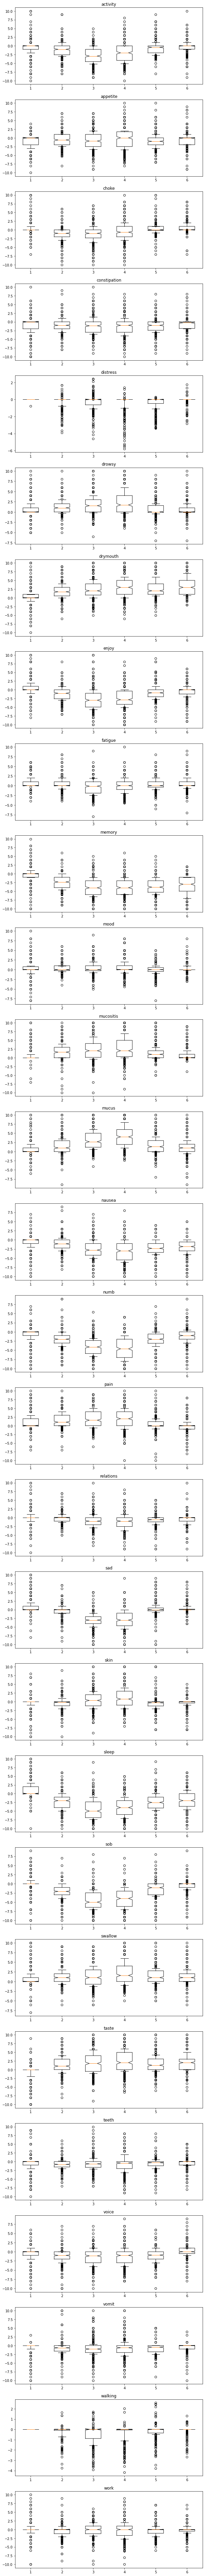

In [240]:
def compare_impute_methods(df1,df2,dates=None,**kwargs):
    #Im 
    if dates is None:
        dates = [0,3,6,7,13,33]
    datelocs = np.array([i for i,d in enumerate( df1.dates.iloc[0]) if d in dates])
    names = df_symptom_names(df1,use_groups=False,use_domains=False)
    a1 = P.df_to_symptom_array(df1,use_groups=False)
    a2 = P.df_to_symptom_array(df2.loc[df1.index],use_groups=False)
    
    a1 = a1[:,:,datelocs]
    a2 = a2[:,:,datelocs]
    diff =a1-a2
    xaxis = [i for i in range(diff.shape[-1])]
    n_symptoms = a1.shape[1]
    fig,axes = plt.subplots(n_symptoms,1,figsize=(10,5*len(names)))
    for col in range(n_symptoms):
        sname = names[col].replace('symptoms_','')
        axis = axes[col]
        axis.set_title(names[col].replace('symptoms_',''))
        x = diff[:,col,:]
        axis.boxplot(x,notch=True,whis=(15,85))
compare_impute_methods(sddf,lstmdf)

In [209]:
def get_lr_dose(df,key='mean_dose'):
    left_organs = [Const.organ_list.index(c) for c in Const.organ_list if 'Lt_' in c]
    right_organs= [Const.organ_list.index(c) for c in Const.organ_list if 'Rt_' in c]
    left = df[key].apply(lambda x: np.sum([x[i] for i in left_organs]))
    right = df[key].apply(lambda x: np.sum([x[i] for i in right_organs]))
    return left > right
[get_lr_dose(sddf).mean(),get_lr_dose(lstmdf).mean()]

[0.96, 0.9566115702479339]

In [6]:
def add_pscore(df,treatment,covariates,
               model=None,
               use_cv=False):
    x = df[treatment].values
    z = np.stack(df[covariates].apply(lambda x: np.stack([np.array(xx) for xx in x])).values)
    pp = predict_propensity(x,z,model=model,use_cv=use_cv)
    df = df.copy()
    df.loc[:,'propensity'] = pp['pscore']
    return df

def predict_cv(model,x,y,cvsize=None):
    #currently leave-one-out
    predictions = []
    y = y.reshape(-1,1)
    if cvsize == None:
        cvsize = int(x.shape[0]*.1)+1
    nsteps = int(np.ceil(x.shape[0]/cvsize))
    start = 0
    for i in range(nsteps):
        stop = min(start + cvsize,x.shape[0])
        test_idx = np.arange(start,stop)
        x_train = np.delete(x, test_idx,axis=0)
        x_test = x[test_idx]
        y_train = np.delete(y,test_idx)
        y_test = y[test_idx]
        
        if x_test.ndim < 2:
            x_test = x_test.reshape(1,-1)
        model.fit(x_train,y_train)
        
        ypred = model.predict_proba(x_test)
        predictions.append(ypred)
        
        start=stop
    ypred = np.concatenate(predictions)
    ypred = ypred.reshape(x.shape[0],-1)
    return ypred

def get_metrics(y,ypred):
    #binary
    squeeze = lambda x: np.argmax(x,axis=1).ravel()
#     y_true = pd.get_dummies(y.loc[:,model.classes_]).values#one-hot encoe
    y_true = y.reshape(-1,1)#binary output shoud work like this idk
    roc = roc_auc_score(y_true,ypred[:,1])
    accuracy = accuracy_score(y_true, squeeze(ypred))
    fscore = f1_score(y_true,squeeze(ypred))
    return {'roc': roc, 'accuracy': accuracy,'fscore':fscore}

def predict_propensity(x,z,model=None,use_cv=False,calibrate=False):
    #assumes binary outcome
    if model is None:
        model = RandomForestClassifier(n_estimators=500,
                                       max_depth=4,
                                       class_weight='balanced')
    if calibrate:
        model = CalibratedClassifierCV(base_estimator=model)
    if use_cv:
        predictions = predict_cv(model,z,x)
    else:
        predictions = model.fit(z,x)
        predictions = model.predict_proba(z)
    model.fit(z,x)
    results  = {'pscore': predictions[:,1], "model": model}
    metrics = get_metrics(x,predictions)
    results['metrics'] = metrics
    return results

def add_weights(cdf,treatment,covariates,model=None):
    if 'propensity' not in cdf.columns:
        cdf = add_pscore(cdf.copy(), treatment, covariates,model=model)
    def get_weight(row):
        if row[treatment] == 1:
            weight = 1/row['propensity']
        else:
            weight = 1/(1-row['propensity'])
        return weight
    cdf.loc[:,'weights'] = cdf.apply(get_weight,axis=1)
    return cdf
    
def get_dr_ate(treatment,outcome,confounders,
               weights = True,
               covariates = None, 
               p_model=None,
               dr_model=None,
               use_proba=True,
               min_propensity=.01,
               calibrate=True,
              ):
    try:
        #this is giving me weird results
        if p_model is None:
    #         p_model = LogisticRegression(class_weight='balanced')
            p_model = RandomForestClassifier(class_weight='balanced')
        if dr_model is None:
            dr_model = LogisticRegression(class_weight='balanced')
            
        if calibrate:
            max_cv = outcome.sum()
            if max_cv < 3:
                cv = max_cv -1
            else:
                cv=5
            dr_model = CalibratedClassifierCV(base_estimator=dr_model,cv=cv)
            p_model = CalibratedClassifierCV(base_estimator=p_model,cv=cv)
        cdf = pd.DataFrame({'treatment':treatment,'outcome':outcome})
        confounder_cols = ['confounder_'+str(i) for i in range(confounders.shape[1])]
        for i,col in enumerate(confounder_cols):
            cdf[col] = confounders[:,i].tolist()

        if 'weights' not in cdf.columns:
            cdf = add_weights(cdf.copy(), 
                              'treatment', 
                              confounder_cols,
                              model=p_model)   
        cdf = cdf[(cdf['propensity'] >= min_propensity) | (cdf.treatment.astype('bool'))]
        cdf.propensity = cdf.propensity.apply(lambda x: np.clip(x,.01,.99))
        y = cdf['outcome'].values.astype('bool')
        input_x = cdf[['treatment']+confounder_cols]

        xcols = ['treatment']+confounder_cols
        x_1 = cdf[xcols]
        x_0 = cdf[xcols]

        x_1.loc[:,'treatment'] = 1
        x_0.loc[:,'treatment'] = 0
        
        dr_model.fit(input_x,y)
        y_1 = dr_model.predict_proba(x_1).astype('float')[:,-1]
        y_0 = dr_model.predict_proba(x_0).astype('float')[:,-1]
        
        if not use_proba:
            y_1 = (y_1 > .5).astype('float')
            y_0 = (y_0 < .5).astype('float')
        cdf['y_0'] = y_0#[:,-1]
        cdf['y_1'] = y_1#[:,-1]


        def dr1(row):
            #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3070495/ table 1
            n1 = row['outcome']*row['treatment']
            n2 = row['y_1']*(row['treatment']-row['propensity'])
            prop = row['propensity']
            return (n1 - n2)/(prop)

        def dr0(row):
            #https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3070495/ table 1
            n1 = row['outcome']*(1-row['treatment'])
            n2 = row['y_0']*(row['treatment'] -row['propensity'])
            return (n1 + n2)/(1-row['propensity'])
        
        cdf['d1'] = cdf.apply(dr1,axis=1)
        cdf['d0'] = cdf.apply(dr0,axis=1)

        ate = cdf['d1'].mean() - cdf['d0'].mean()
        return ate#, cdf.drop(confounder_cols,axis=1)
    except Exception as e:
        print('error in doubly robust ate', e)
        return -1

    
def get_iptw_ate(treatment,outcome,confounders,
               weights = True,
               covariates = None, 
               p_model=None,
               use_proba=True,
               min_propensity=.001,
               calibrate=True,
              ):
    try:
        if p_model is None:
    #         p_model = LogisticRegression(class_weight='balanced')
            p_model = RandomForestClassifier(class_weight='balanced')
        if calibrate:
            p_model = CalibratedClassifierCV(base_estimator=p_model)
        cdf = pd.DataFrame({'treatment':treatment,'outcome':outcome})
        confounder_cols = ['confounder_'+str(i) for i in range(confounders.shape[1])]
        for i,col in enumerate(confounder_cols):
            cdf[col] = confounders[:,i].tolist()

        if 'weights' not in cdf.columns:
            cdf = add_weights(cdf.copy(), 
                              'treatment', 
                              confounder_cols,
                              model=p_model)   
        cdf = cdf[(cdf['propensity'] >= min_propensity) | (cdf.treatment.astype('bool'))]
        treat= cdf[cdf['treatment']]
        con = cdf[~cdf['treatment']]
        y_1 = (treat['outcome'] * treat['weights']).sum()/treat.shape[0]
        y_0 = (con['outcome'] * con['weights']).sum()/con.shape[0]
        return y_1 - y_0
    except Exception as e:
        print('error in iptw ate', e)
        return -1

def get_matching_ate(treatment,outcome,confounders,
               weights = True,
               covariates = None, 
               p_model=None,
               use_proba=True,
               min_propensity=.001,
               replacement = False,
               calibrate=True,
              ):
    try:
        if p_model is None:
            p_model = RandomForestClassifier(class_weight='balanced')
        if calibrate:
            p_model = CalibratedClassifierCV(base_estimator=p_model)
        cdf = pd.DataFrame({'treatment':treatment,'outcome':outcome})
        confounder_cols = ['confounder_'+str(i) for i in range(confounders.shape[1])]
        for i,col in enumerate(confounder_cols):
            cdf[col] = confounders[:,i].tolist()

        if 'propensity' not in cdf.columns:
            cdf = add_pscore(cdf.copy(), 
                              'treatment', 
                              confounder_cols,
                              model=p_model)   
        cdf = cdf[(cdf['propensity'] >= min_propensity) | (cdf.treatment.astype('bool'))]
        treat= cdf[cdf['treatment']]
        control = cdf[~cdf['treatment']]
        matches = []
        for i,row in treat.iterrows():
            con = control.copy()
            con['pdiff'] = con['propensity'].apply(lambda x: np.abs(x - row['propensity']))
            matchdf = con[con.pdiff == con.pdiff.min()]
            if not replacement:
                control = control.drop(matchdf.index)
                if control.shape[0] < 2:
                    break
            matches.append(matchdf)
        matched_control= pd.concat(matches,axis=0)
        standard_ate = (treat['outcome'].mean() - matched_control['outcome'].mean())
        return standard_ate
    except Exception as e:
        print('error in matching ate', e)
        return -1
    

    
treatment = sddf['dose_clusters'].apply(lambda x: x == 3).values
outcome = sddf['t4'].values
confounders = sddf[['n3','old']].values
print(treatment.shape,outcome.shape,confounders.shape)
get_dr_ate(treatment,outcome,confounders)

(350,) (350,) (350, 2)


0.010009914933535036

In [7]:
def get_aggregate_outcome(df,symptoms,dates,aggfunc=None):
    if aggfunc is None:
        aggfunc = np.max
    df = df.copy()
    date_idxs = [i for i,d in enumerate(df.dates.iloc[0]) if d in dates]
#     print('dates',dates,date_idxs)
    s_array = np.zeros((df.shape[0],len(symptoms)))
    for col,symptom in enumerate(symptoms):
        if 'symptoms_'+symptom not in df.columns:
            print('missing',symptom)
        svals = df['symptoms_'+symptom].apply(lambda x: np.max([x[i] for i in date_idxs]) )
        s_array[:,col] = svals
    res = np.apply_along_axis(aggfunc,1,s_array)
    return res

def add_outcomes(df,symptoms,dates,aggfunc=None):
    vals = get_aggregate_outcome(df,symptoms,dates,aggfunc)
    name = '_'.join(symptoms) + '_' + '-'.join([str(d) for d in dates])
    df = df.copy()
    df[name] = vals
    return df

def filter_confounders(confounders,treatment,outcome,max_pval = .1):
    #gvien a list of covariates, get true confounders based on correlation vis f-test
    #only returns covariates with a correlation below max_pval
    #if none, returns the most correlated value so i'ts not an empty set
    xz = f_classif(confounders,treatment)[1]
    xy = f_classif(confounders,outcome)[1]
    max_p = np.maximum(xz,xy)
    #if none below threshold, take the minimum pvalue instead
    max_pval = max(np.min(max_p),max_pval)
    valid = max_p <= max_pval
    #assumes confounders is a df for now
    return confounders.iloc[:,valid]

def aggregate_ate_results(res):
    agg_by = [c for c in res.columns if '_ate' not in c]
    ate_cols = [c for c in res.columns if '_ate' in c]
    new_results = []
    for i, subdf in res.groupby(agg_by):
        entry = {}
        for name, val in zip(agg_by,i):
            entry[name] = val
        for atetype in ate_cols:
            quants = subdf[atetype].quantile([.05,.5,.95]).values
            is_negative = np.sign(np.max(quants)) < 0
            is_positive = np.sign(np.min(quants)) > 0
            signficiant = is_negative or is_positive
            entry[atetype + '_05'] = quants[0]
            entry[atetype + '_median'] = quants[1]
            entry[atetype + '_95'] = quants[2]
            entry[atetype + '_sig'] = signficiant
            entry[atetype + '_positive'] = is_positive
        new_results.append(entry)
    return pd.DataFrame(new_results).sort_values(['dr_ate_05'],ascending=False)

def var_tests(df, testcol, ycol,xcols, 
#              boolean=True,
             regularize = True,
             scale=True):
    df = df.fillna(0)
    y = df[ycol]
    if y.max() > 1:
        y = y/y.max()
    if testcol not in xcols:
        xcols = xcols + [testcol]
    x = df[xcols].astype(float)
    if regularize:
        for col in xcols:
            x[col] = (x[col] - x[col].mean())/(x[col].std()+ .01)
    if scale:
        for col in xcols:
            x[col] = (x[col] - x[col].min())/(x[col].max() - x[col].min())
    for col in xcols:
        if x[col].std() < .00001:
#             print(col)
            x = x.drop(col,axis=1)
    x2 = x.copy()
    x2 = x2.drop(testcol,axis=1)
    boolean = (df[ycol].max() <= 1) and (len(df[ycol].unique()) <= 2)
    if boolean:
        model = sm.Logit
        method = 'bfgs'
        
    else:
        model = sm.OLS
        method= 'qr'
    logit = model(y,x)
    logit_res = logit.fit(maxiter=500,
                          disp=False,
                          method=method,
                         )
    
    logit2 = model(y,x2)
    logit2_res = logit2.fit(maxiter=500,
                            disp=False,
                            method=method,
                           )
    
    llr_stat = 2*(logit_res.llf - logit2_res.llf)
    llr_p_val = chi2.sf(llr_stat,1)
    
    aic_diff = logit_res.aic - logit2_res.aic
    bic_diff = logit_res.bic - logit2_res.bic
    
    results = {
        'ttest_pval': logit_res.pvalues[testcol],
        'ttest_tval': logit_res.tvalues[testcol],
        'lrt_pval': llr_p_val,
        'aic_diff': aic_diff,
        'bic_diff': bic_diff
    }
    return results

def multi_var_tests(df, testcols, ycol,xcols, 
#              boolean=True,
             regularize = True,
             scale=True):
    df = df.fillna(0)
    y = df[ycol]
    if y.max() > 1:
        y = y/y.max()
    xcols = list(set(xcols).union(set(testcols)))
    x = df[xcols].astype(float)
    if regularize:
        for col in xcols:
            x[col] = (x[col] - x[col].mean())/(x[col].std()+ .01)
    if scale:
        for col in xcols:
            x[col] = (x[col] - x[col].min())/(x[col].max() - x[col].min())
    for col in xcols:
        if x[col].std() < .00001:
#             print(col)
            x = x.drop(col,axis=1)
    x2 = x.copy()
    x2 = x2.drop(testcols,axis=1)
    boolean = (df[ycol].max() <= 1) and (len(df[ycol].unique()) <= 2)
    if boolean:
        model = sm.Logit
        method = 'bfgs'
        
    else:
        model = sm.OLS
        method= 'qr'
    logit = model(y,x)
    logit_res = logit.fit(maxiter=500,
                          disp=False,
                          method=method,
                         )
    
    logit2 = model(y,x2)
    logit2_res = logit2.fit(maxiter=500,
                            disp=False,
                            method=method,
                           )
    
    llr_stat = 2*(logit_res.llf - logit2_res.llf)
    llr_p_val = chi2.sf(llr_stat,len(testcols))
    
    aic_diff = logit_res.aic - logit2_res.aic
    bic_diff = logit_res.bic - logit2_res.bic
    
    results = {
        'lrt_pval': llr_p_val,
        'aic_diff': aic_diff,
        'bic_diff': bic_diff
    }
#     for testcol in testcols:
#         results['ttest_pval_' + str(testcol)]= logit_res.pvalues[testcol]
#         results['ttest_tval_' + str(testcol)]= logit_res.tvalues[testcol]
    return results

def get_stratification_metrics(y,ypred,model):
    #binary
    squeeze = lambda x: np.argmax(x,axis=1).ravel()
#     y_true = pd.get_dummies(y.loc[:,model.classes_]).values#one-hot encoe
    y_true = y.reshape(-1,1)#binary output shoud work like this idk
    roc = roc_auc_score(y_true,ypred[:,1])
    accuracy = accuracy_score(y_true, squeeze(ypred))
#     fscore = f1_score(y_true,squeeze(ypred))
    [precision,recall,fscore,support] = precision_recall_fscore_support(y_true,squeeze(ypred),average='binary')
    fbeta = lambda b: (1+b**2)*(precision*recall)/((b**2)*precision + recall)
    f_half = fbeta(.5)
    f2 = fbeta(2)
    matthews = matthews_corrcoef(y_true,squeeze(ypred))
    dor = (recall*precision)/((1-recall)*(1-precision))
    results=  {
        'roc': roc, 
        'mcc': matthews,
        'dor': dor,
        'accuracy': accuracy,
        'precision': precision,
        'recall':recall,
        'f1': fscore,
        'f_half': f_half,
        'f2': f2,
    }
    return results


In [ ]:
def get_limit_performance(df,other_cols = ['t4','t3','t_severe','n3','n_severe']):
    limits = [c for c in df.columns if '_limit' in c]
    y = ct.get_outcome()
    results = []
    for limit in limits + other_cols:
        subdf = df[~df[limit].isnull()]
        ypred = np.zeros((len(y),2))
        ypred[:,1] = subdf[limit].values
        ypred[:,0] = ~subdf[limit].values
        res = get_metrics(y,ypred)
        res['name'] = limit
        results.append(res)
    return pd.DataFrame(results)
get_limit_performance(sddf)

In [8]:
def extract_dose_vals(df,organs,features,include_limits = False):
    oidxs = [Const.organ_list.index(o) for o in organs if o in Const.organ_list]
    df = df.copy()
    vals = []
    names = []
    for f in features:
        for (oname, oidx) in zip(organs,oidxs):
            values = df[f].apply(lambda x: x[oidx]).values
            vals.append(values.reshape((-1,1)))
            names.append(f+'_'+oname)
    vals = np.hstack(vals)
    vals = pd.DataFrame(vals,columns=names,index=df.index)
    if include_limits:
        limit_cols = [t for t in df.columns if '_limit' in t]
        for l in limit_cols:
            vals[l] = df[l].astype(int).fillna(0)
    return vals 

def get_outcomes(df,symptoms,dates,threshold=None):
    date_idxs = [i for i,d in enumerate(df.dates.iloc[0]) if d in dates]
    res = []
    get_max_sval = lambda s: df['symptoms_'+s].apply(lambda x: np.max([x[i] for i in date_idxs]) ).values
    res = {symp:get_max_sval(symp) for symp in symptoms}
    return pd.DataFrame(res,index=df.index)

def add_post_clusters(df,post_results):
    cmap = {}
    for c_entry in post_results['clusterData']:
        cId = c_entry['clusterId']
        for pid in c_entry['ids']:
            cmap[int(pid)] = cId
    df = df.copy()
    df['post_cluster'] = df.id.apply(lambda i: cmap.get(int(i),-1))
    return df
        
def process_rule_async(args):
    [df,col,y,currval,min_split_size,min_odds,min_info] = args
    vals = df[col]
    rule = vals >= currval
    entry = {
        'features': [col],
        'thresholds': [currval],
        'splits': [rule],
        'rule': rule
    }
    entry = evaluate_rule(entry,y)
    if valid_rule(entry,min_split_size,min_odds=min_odds,min_info=min_info):
        return entry
    return False
    
def get_rule_df(df,y,granularity=2,min_split_size=10,min_odds=0,min_info=.01):
    split_args = []
    minval = df.values.min().min()
    maxval = df.values.max().max()
    granularity_vals = [i*granularity + minval for i in np.arange(np.ceil(maxval/granularity))]
    for col in df.columns:
        if '_limit' in col:
            split_args.append((df,col,y,.5,1,0,0))
        else:
            for g in granularity_vals:
                split_args.append((df,col,y,g,min_split_size,min_odds,min_info))
    splits = joblib.Parallel(n_jobs=-2)(
        joblib.delayed(process_rule_async)(args) for args in split_args)
    return [s for s in splits if s is not False]

def combine_rule(r1,r2):
    if r1 is None:
        combined = r2
    elif r2 is None:
        combined = r1
    else:
        newthresholds = r1['thresholds'][:]
        newfeatures = r1['features'][:]
        newsplits = r1['splits'][:]
        newrule = r1['rule']
        fstring = stringify_features(newfeatures)
        for i,f in enumerate(r2['features']):
            #only one split per feature
            if stringify_features([f]) not in fstring:
                newfeatures.append(f)
                t = r2['thresholds'][i]
                s = r2['splits'][i]
                newthresholds.append(t)
                newsplits.append(s)
                newrule = newrule*s
        combined = {
            'features': list(newfeatures),
            'thresholds': list(newthresholds),
            'splits': newsplits,
            'rule': newrule
        }
    return combined

def evaluate_rule(rule, y):
    r = rule['rule']
    upper = y[r]
    lower = y[~r]
    entry = {k:v for k,v in rule.items()}
    entry['info'] = mutual_info_classif(r.values.reshape(-1,1),y.values.ravel(),
                                        random_state=1,discrete_features=True,n_neighbors=5)[0]
    ucount = upper.mean().values[0]
    lcount = lower.mean().values[0]
    if ucount < lcount:
        temp = ucount
        ucount = lcount
        lcount = temp
    lcount = max(lcount, 1)
    entry['odds_ratio'] = ucount / lcount
    for prefix, yy in zip(['lower','upper'],[lower,upper]):
        entry[prefix+'_count'] = yy.shape[0]
        entry[prefix+'_tp'] = yy.sum().values[0]
        entry[prefix+'_mean'] = yy.mean().values[0]
    return entry 

def filter_rules(rulelist, bests,tholds,criteria):
    is_best = lambda r: (r[criteria] >= bests.get(stringify_features(r['features']),0)) and (
        stringify_thresholds(r['thresholds']) == tholds.get(stringify_features(r['features'])) )
    filtered = [r for r in rulelist if is_best(r)]
    return filtered
    
def stringify_features(l):
    #turns a list of features in the form 'VXX_Organ' into a hashable set
    #removes V thing becuase I think it shold be per organ
    return ''.join(sorted([ll[3:] for ll in l]))

def stringify_thresholds(t):
    return ''.join([str(int(tt)) for tt in t])

def combine_and_eval_rule(args):
    [baserule,rule,outcome_df] = args
    r = combine_rule(baserule,rule)
    r = evaluate_rule(r,outcome_df)
    return r

def get_best_rules(front, allrules,outcome_df,min_odds,criteria='info'):
    new_rules = []
    bests = {}
    best_thresholds = {}
    if len(front) < 1:
        front = [None]
    minsplit = max(5,int(outcome_df.shape[0]/10))
    for baserule in front:
        combined_rules = joblib.Parallel(n_jobs=4)(joblib.delayed(combine_and_eval_rule)((baserule,r,outcome_df)) for r in allrules)
        for combined_rule in combined_rules:
            if valid_rule(combined_rule,minsplit,min_odds):
                if (baserule is not None) and combined_rule[criteria] <= baserule.get(criteria,0):
                    continue
                rname = stringify_features(combined_rule['features'])
                if bests.get(rname,0) < combined_rule[criteria]:
                    #look at best info/odds ratio fro each set of organs
                    bests[rname] = combined_rule[criteria]
                    #svae thresholds as a tie-breaker
                    best_thresholds[rname] = stringify_thresholds(combined_rule['thresholds'])
                new_rules.append(combined_rule)
    new_rules = filter_rules(new_rules,bests,best_thresholds,criteria)
    return new_rules
    

def valid_rule(r,min_split_size=5,min_odds=0,min_info=.01):
    if r['odds_ratio'] < min_odds:
        return False
    if r.get('info',0) <= min_info:
        return False
    if min(r['upper_count'],r['lower_count']) < min_split_size:
        return False
    return True

In [684]:

class ClusterTester():
    
    def __init__(self,df,
                 cluster_organs, 
                 n_clusters=4, 
                 symptoms=None,
                 cluster_features=None,
                 outcome_dates=None,
                 default_confounders=None,
                 agg_type='max',
                 **kwargs,
                ):
        
        self.cluster_organs = cluster_organs
        self.n_clusters = n_clusters
        
        if symptoms is None:
            symptoms = ['drymouth']
        self.symptoms = symptoms
        
        if cluster_features is None:
            cluster_features = ['V40','V45','V50','V55','V60']
        self.cluster_features = cluster_features
        
        if outcome_dates is None:
            outcome_dates = [13,33]
        self.outcome_dates = outcome_dates
        
        if agg_type == 'mean' or agg_type == 'average':
            self.agg_func = np.nanmean
        else:
            self.agg_func = np.nanmax
            
            
        if default_confounders is None:
            default_confounders = ['t4','t3','n2','n3','hpv','BOT','Tonsil','Parotid_Gland_limit']
        self.default_confounders = default_confounders
        df = df.copy()
        df = self.filter_df(df)
        self.df = df
        self.cluster_df=None
        self.current_mimic = None
        self.current_rules = None
        
    def get_cluster_df(self,
                       resample=False,
                       use_mimic=False,
                       use_cached=True,
                       **kwargs):
        #currently resample works before clustering and not using mimic models 
        #if not caching and afterwords otherwise
        df = self.df.copy()
        if use_mimic:
            if self.current_mimic is not None and use_cached:
                df = self.current_mimic.copy()
            else:
                df, _ = self.get_mimic_clusters(max_rules=1,**kwargs)
            df = df.copy()
            df['dose_clusters'] = df['mimic_cluster_'+str(self.n_clusters-1)+'_0'].astype(int)
        else:
            if use_cached and self.cluster_df is not None:
                df = self.cluster_df.copy()
            else:
                #If rd
                if resample:
                    df = df.sample(frac=1)
                df = P.add_sd_dose_clusters(df,
                                    features=self.cluster_features,
                                    organ_subset=self.cluster_organs,
                                    n_clusters = self.n_clusters)
                return df
        if resample:
            df = df.sample(frac=1)
        return df
    
    def get_outcome(self,threshold=5):
        outcome = get_aggregate_outcome(self.df,self.symptoms,self.outcome_dates,aggfunc=self.agg_func)
        if threshold > 0:
            outcome = outcome >= threshold
        return outcome
    
    def df_with_outcome(self,key='outcome',threshold=5):
        df = self.df.copy()
        df[key] = self.get_outcome(threshold=threshold)
        return df
        
    def filter_df(self,df):
        keywords = ['_original','_max_','_6wk_symptoms','_late_symptoms']
        for keyword in keywords:
            to_drop = [col for col in df.columns if keyword in col]
            df = df.drop(to_drop,axis=1)
        return df
    
    def extract_dose_vals(self,organ_list,features=None,as_df=True):
        oidxs = [Const.organ_list.index(o) for o in organ_list if o in Const.organ_list]
        
        if features is None:
            features = self.cluster_features
        df = self.df.copy()
        vals = []
        names = []
        for f in features:
            for (oname, oidx) in zip(organ_list, oidxs):
                values = df[f].apply(lambda x: x[oidx])
                vals.append(values.values.reshape((-1,1)))
                names.append(f+'_'+oname)
        vals = np.hstack(vals)
        if as_df:
            vals = pd.DataFrame(vals,columns=names,index=self.df.index)
        return vals
    
    def extract_confounders(self,categorical_confounders=None,use_dose_confounders=False,organ_confounders=None,organ_confounder_features=None):
        if categorical_confounders is None:
            categorical_confounders = [dc for dc in self.default_confounders if dc != 'age']
            if 'age' in self.default_confounders:
                categorical_confounders = categorical_confounders + ['old']
        categorical_confounders = [c for c in categorical_confounders if c in self.df.columns]
        confounders = self.df[categorical_confounders].astype('float')
        if organ_confounders is None and use_dose_confounders:
            organ_confounders = [o for o in Const.organ_list if o not in self.cluster_organs]
        if organ_confounders is not None:
            if organ_confounder_features is None:
                organ_confounder_features = self.cluster_features
            dose_confounders = self.extract_dose_vals(
                organ_confounders,
                features=organ_confounder_features)
            confounders = pd.concat([dose_confounders,confounders],axis=1)
        return confounders
    
    def resample_df(self):
        df = self.df.copy().sample(frac=1)
        
    def get_ate(self,
                use_iptw=True,
                use_dr=True,
                use_matching=False,
                thresholds=[3,5,7],
                use_dose_confounders=False,
                n_iters = 10,
                confounder_pval_filter=.1,
                skip_first = True,
                aggregate = True,
                use_mimic=False,
                **kwargs):
        resample_df = (n_iters > 1)
        results = []
        if not resample_df:
            df = self.get_cluster_df(resample=False,use_mimic=use_mimic)
        for n in range(n_iters):
            if resample_df:
                df = self.get_cluster_df(resample = True,use_mimic=use_mimic)
            clustvals = df['dose_clusters'].unique()
            confounders = self.extract_confounders(
                use_dose_confounders=use_dose_confounders,
                **kwargs)
            
            for c in clustvals:
                if c == np.min(clustvals) and skip_first:
                    continue
                treatment = (df['dose_clusters'] == c).astype(bool).values.ravel()
                for threshold in thresholds:
                    outcome = self.get_outcome(threshold=threshold).ravel()
                    if confounder_pval_filter < 1:
                        temp_confounders = filter_confounders(confounders,treatment,outcome,
                                                             max_pval=confounder_pval_filter).values
                    else:
                        temp_confounders = confounders.values
                    ate_entry = {'threshold':threshold,'cluster_value':c}
                    if use_iptw:
                        iptw = get_iptw_ate(treatment,outcome,temp_confounders)
                        ate_entry['iptw_ate'] = iptw
                    if use_dr:
                        dr = get_dr_ate(treatment,outcome,temp_confounders)
                        ate_entry['dr_ate'] = dr
                    if use_matching:
                        matching = get_matching_ate(treatment,outcome,temp_confounders)
                        ate_entry['matching_ate'] = matching
                    print(ate_entry,end='\r')
                    results.append(ate_entry)
        results = pd.DataFrame(results)
        results = results.sort_values(['cluster_value','threshold'],kind='mergesort')
        if aggregate and n_iters > 1:
            results = aggregate_ate_results(results)
        return results
    
    def get_basic_correlation(self,n_iters = 1, cluster=None, threshold = 0,use_mimic=False):
        pvals = []
        odds = []
        #gets pvalue or odds ratio with optional bootstrapping
        #will use fisher exact is both cluster and outcome are boolean
        #cluster = None and threshold = 0 use categorical
        if use_mimic:
            cluster=1
        use_chi2 = (cluster==None) or threshold < 1
        for n in range(n_iters):
            resample = n_iters > 1
            df = self.get_inference_df(threshold=threshold,cluster=cluster,use_mimic=use_mimic)
            x = df['x']
            outcome = df['outcome']
            try:
                if use_chi2:
                    odds_ratio,pval = Metrics.vector_chi2(x,outcome)
                else:
                    odds_ratio, pval = Metrics.boolean_fisher_exact(x,outcome)
                pvals.append(pval)
                odds.append(odds_ratio)
            except Exception as e:
                print(e)
        return pvals, odds
    
    def get_base_correlation_df(self,n_iters=1,thresholds=None,use_mimic=False,):
        #get pvalue correlations for all/individual clusters either as a linear thing
        #or with different threhsolds
        results = []
        clusters = [None] + [i for i in range(self.n_clusters)]
        #threshold = 0 will be 1-10 isntead of the boolean thing
        if thresholds is None:
            thresholds = [0,3,5,7]
        for thold in thresholds:
            for clust in clusters:
                pvals, odds = self.get_basic_correlation(cluster=clust,
                                                         threshold=thold,
                                                         use_mimic=use_mimic,
                                                         n_iters=n_iters)
                for p,o in zip(pvals,odds):
                    entry = {
                        'threshold': thold,
                        'cluster': clust if clust is not None else -1,
                        'pval': p,
                        'effect_size': o,
                    }
                    results.append(entry)
        return pd.DataFrame(results)
    
    
    def get_inference_df(self,
                         cluster=None,
                         threshold=0,
                         resample=False,
                         use_mimic=False,
                         onehotify=False,
                         confounders=None):
        #I wrote this after the ate stuff so it won't update in that funcion call if you change this
        df = self.get_cluster_df(resample=resample,use_mimic=use_mimic)
        df['x'] = df['dose_clusters']
        if cluster is not None and cluster >= 0:
            df['x'] = df['dose_clusters'].apply(lambda x: x==cluster)
        df['outcome'] = self.get_outcome(threshold=threshold)
        to_keep = ['x','outcome']
        if confounders is not None:
            to_keep.extend(confounders)
        to_keep = [c for c in to_keep if c in df.columns]
        df = df[to_keep]
        if onehotify:
            ignore = ['outcome']
            for c in confounders:
                if len(df[c].unique() < 5):
                    ignore = ignore + [c]
            if len(df['x'].unique()) <= 2:
                ignore = ignore + ['x']
            if len([c for c in df.columns if c not in ignore]) > 0:
                df = Utils.onehotify(df,ignore=ignore,drop_first=True)
        return df
    
    def get_lrt_correlations(self,confounders=None,
                             resample=False,
                             threshold=0,
                             use_mimic=False,
                             use_individual_effects=True,
                             cluster=None):
        if confounders is None:
            confounders =self.default_confounders[:]
        df = self.get_inference_df(threshold=threshold,
                                   onehotify=True,
                                   cluster=cluster,
                                   use_mimic=use_mimic,
                                   resample=resample,
                                   confounders=confounders)
        treatment = ['x']
        #this wouldn't work if you have aconfounder with a similar label idk
        confounders = [c for c in df.columns if np.any([cc in c for cc in confounders])]
        if cluster is None and not use_mimic and self.n_clusters > 2:
            treatment = [c for c in df.columns if 'x_' in c and c not in confounders]
        results = multi_var_tests(df.fillna(0),treatment,'outcome',confounders)
        #basically calculates pvalues when we don't include other clusters for each clusters
        #these currently use the smae name convention so it will replace the old values if future you don't change stuff
        #I think the other way doens't really make sense since clusters are redundant
        for t in treatment:
            vals =var_tests(df.fillna(0),t,'outcome',confounders)
            for k,v in vals.items():
                key = k+'_'+t
                results[key] = v
        return results
    
    def get_lrt_correlation_df(self,
                               thresholds=None,
                               confounder_list=None,
                               resample=False,
                               use_mimic=False,
                               include_delong=True,
                               clusters=None):
        #get pvalue correlations for all/individual clusters either as a linear thing
        #or with different threhsolds
        results = []
        #because it does individual coefficients you doen't really need other clusters idk
        if clusters is None:
            clusters = [None]
        #threshold = 0 will be 1-10 isntead of the boolean thing
        if thresholds is None:
            thresholds = [0,3,5,7]
        if confounder_list is None:
            confounder_list = [self.default_confounders]
        for thold in thresholds:
            for clust in clusters:
                for confounders in confounder_list:
                    res = self.get_lrt_correlations(cluster=clust,
                                                    threshold=thold,
                                                    resample=resample,
                                                    use_mimic=use_mimic,
                                                    confounders=confounders)
                    
                    entry = {
                        'cluster': clust if clust is not None else -1,
                        'threshold':thold,
                        'confounders': confounders,
                    }
                    
                    for k,v in res.items():
                        entry[k] = v
                    if include_delong:
                        pval = 1
                        if thold > 0:
                            pval = self.delong_roc(cluster=clust,threshold=thold,use_mimic=use_mimic,confounders=confounders)
                        dcol = 'delong_pval_x' 
                        if clust is not None and clust > -1:
                            dcol += '_'+ str(clust)
                        entry[dcol] = pval
                    results.append(entry)
        return pd.DataFrame(results)
    
    def predict_cv(self,
                   confounders=None,
                   threshold=5,
                   cluster=None,
                   use_mimic=False,
                   resample=False,            
                   model=None):
        if confounders is None:
            confounders =self.default_confounders
        df = self.get_inference_df(threshold=threshold,
                                   onehotify=True,
                                   cluster=cluster,
                                   resample=resample,
                                   use_mimic=use_mimic,
                                   confounders=confounders)
        treatment = ['x']
        
        confounders = [c for c in df.columns if np.any([cc in c for cc in confounders])]
        if cluster is None and not use_mimic:
            treatment = [c for c in df.columns if 'x_' in c and c not in confounders]
        xcols = treatment+confounders
        y = df['outcome'].values
        if model is None:
            model = LogisticRegression(class_weight='balanced')
        scale = lambda x: (x - x.min())/(x.max()-x.min())
        for c in treatment+confounders:
            if df[c].dtype != bool:
                df[c] = scale(df[c].fillna(0))
        ypred = predict_cv(model,df[treatment+confounders].values,y)
        ypred_baseline = predict_cv(model,df[confounders].values,y)
        return y, ypred, ypred_baseline
    
    def delong_roc(self,threshold=5,**kwargs):
        y, ypred, ypred_baseline = self.predict_cv(threshold=threshold,**kwargs)
        return delong(y.astype(int), ypred[:,1], ypred_baseline[:,1])[0][0]
        
    def get_cv_auc(self,**kwargs):
        y, ypred, ypred_baseline = self.predict_cv(**kwargs)
        metrics = get_stratification_metrics(y,ypred,model)
        metrics_baseline = get_stratification_metrics(y,ypred_baseline,model)
        
        results = {}
        for k,v in metrics.items():
            results[k] = v
            baseline = metrics_baseline[k]
            if baseline is None:
                baseline = 0
            results[k+'_change'] = v - baseline
        return results
    
    def get_demographic_breakdown(self,
                                  cat_cols = None, 
                                  cont_cols = None,
                                  include_outcome=True,
                                  use_mimic=False,
                                 ):
        df = self.get_cluster_df(use_mimic=use_mimic)
        clust_col = 'dose_clusters'
        if cat_cols is None:
            cat_cols = [
                'is_male','t_stage','n_stage','hpv',
                'ic','os','subsite','BOT','Tonsil',
                'Parotid_Gland_limit','IPC_limit','MPC_limit','SPC_limit',
            ]
        if cont_cols is None:
            cont_cols = [
                'age',
                'followup_days',
            ]
        if include_outcome:
            outcome_name = '-'.join(self.symptoms)
            for thold in [3,5,7]:
                cname = outcome_name+'>'+str(thold)
                df[cname] = self.get_outcome(threshold=thold)
                cat_cols.append(cname)
        results = {'counts': pd.Series({c: d.shape[0] for c,d in df.groupby('dose_clusters')},name='cluster')}
        for col in cat_cols:
            catdf = df[~df[col].isnull()]
            entrys = {}
            vchi2 = Metrics.vector_chi2(catdf[clust_col],catdf[col])
            for clust, subdf in catdf.groupby(clust_col):
                subchi2 = Metrics.vector_chi2(catdf.dose_clusters.apply(lambda x: x == clust), catdf[col])
                clust_entry = {'pval': subchi2[1],'tval':subchi2[0],'overall_pval':vchi2[1]}
                csize = subdf.shape[0]
                for vName, subsubdf in subdf.groupby(col):
                    count = subsubdf.shape[0]
                    clust_entry[vName] = str(count) + ' (' + str(np.round(count*100/csize,1)) + ')%'
                entrys[clust] = clust_entry
            edf = pd.DataFrame(entrys).T
            edf.index.name = 'cluster'
            results[col] = edf
        cont_results = {}
        def get_dist(vals):
            vals = vals.astype(float)
            [q5,median,q95] = vals.quantile([.05,.5,.95])
            mean = vals.mean()
            std = vals.std()
            ce = {
                'mean': mean,
                'std': std,
                'q5': q5,
                'median': median,
                'q95': q95,
            }
            return ce
        
        for col in cont_cols:
            tempdf = df[~df[col].isnull()]
            entrys = {}
            combined_entry = get_dist(tempdf[col])
            for clust, subdf in tempdf.groupby(clust_col):
                clust_entry = get_dist(subdf[col])
                tempchi2 = Metrics.vector_chi2(tempdf.dose_clusters.apply(lambda x: x == clust), tempdf[col])
                clust_entry['tval'] = tempchi2[0]
                clust_entry['pval'] = tempchi2[1]
                entrys[clust] = clust_entry
            edf = pd.DataFrame(entrys).T
            edf.index.name = 'cluster'
            results[col] = edf
        return results
    
    def get_current_rules(self,**kwargs):
        if self.current_rules is None:
            self.get_mimic_clusters(**kwargs)
        rule = self.current_rules[self.n_clusters-1]
        return rule[0]
    
    def show_rule(self,**kwargs):
        rule = self.get_current_rules(*kwargs)
        f = rule.get('features')
        t = rule.get('thresholds')
        string = ''
        if f is not None and t is not None:
            for ff,tt in zip(f,t):
                string += str(ff) + '>' + str(tt) + ', '
                
        return string[:len(string)-2]
    
    def get_mimic_clusters(self,
                           granularity=2,
                           max_frontier=30,
                           max_rules=1,
                           criteria='info',
                           useLimits=False,
                           target_clusters=None,
                           min_odds = 0,
                           min_info=.18,
                           maxdepth=4):
        df = self.get_cluster_df()
        organs =self.cluster_organs[:]
        features = self.cluster_features[:]
        outcome = self.get_outcome()

        dose_df = extract_dose_vals(df,organs,features,include_limits=useLimits)

        if target_clusters == None:
            target_clusters = [self.n_clusters -1]
        rulesets = {}
        for target_cluster in target_clusters:
            df['y'] = df.dose_clusters.apply(lambda x: x == target_cluster)
            y = df[['y']]
            rules = get_rule_df(dose_df,y,min_odds=min_odds,granularity=granularity)
            sort_rules = lambda rlist: sorted(rlist, key=lambda x: -x[criteria])
            rules = sort_rules(rules)
            min_info = min(rules[0].get('info',0.0)*.6,float(min_info))
            rules = [r for r in rules if r.get('info',0) >= min_info]
#             print('n rules',len(rules))
            frontier = [None]
            best_rules = []
            depth = 0
            while (depth < maxdepth) and (frontier is not None) and (len(frontier) > 0):
                frontier = get_best_rules(frontier,rules,y,min_odds=min_odds,criteria=criteria)
                frontier = sorted(frontier, key = lambda x: -x[criteria] if x is not None else 0)
                frontier = frontier[:max_frontier]
                depth += 1
                best_rules.extend(frontier)
#                 print('lb',len(best_rules))
#                 print()
            best_rules = sort_rules(best_rules)
            best_rules = best_rules[:max_rules]
            for i,rule in enumerate(best_rules):
                df['mimic_cluster_'+str(target_cluster)+'_'+str(i)] = rule['rule'].astype(int).values
            rulesets[target_cluster]= best_rules
        self.current_mimic = df.copy()
        self.current_rules = {k:v for k,v in rulesets.items()}
        return df, rulesets
            
ooi = [
#     'Tongue',
    'Genioglossus_M',
#     'Mylogeniohyoid_M',
#     'Extended_Oral_Cavity',
    'Rt_Parotid_Gland','Lt_Parotid_Gland',
    'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#     'Rt_Ant_Digastric_M','Lt_Ant_Digastric_M',
      ]
n =3
cfeatures = ['V40','V45','V50','V55',"V60"]
ct = ClusterTester(sddf,
                   ooi,
                   n_clusters=n,
                   cluster_features=cfeatures,
                  )
# 
print(ct.show_rule())
[ct.delong_roc(),ct.delong_roc(use_mimic=True)]

V50_Rt_Submandibular_Gland>46.0


[0.0398667491542407, 0.010787891522511263]

In [652]:
choke_organs = [
    'IPC','MPC',
    'Supraglottic_Larynx',
    'Mylogeniohyoid_M',
]
choke_ct = ClusterTester(sddf,
                       choke_organs,
                       symptoms=['choke'],
                       n_clusters=n,
                       confounders=['hpv','IPC_limit','MPC_limit','SPC_limit','BOT','Tonsil','t3','t4','n2','n3'],
                       cluster_features=cfeatures
                      )
print(choke_ct.show_rule())
[choke_ct.delong_roc(),choke_ct.delong_roc(use_mimic=True)]

V55_MPC>70.0, V55_Supraglottic_Larynx>32.0


[0.21419256050366717, 0.31005165601419776]

In [660]:
lstm_ct = ClusterTester(lstmdf,
               ooi,
               n_clusters=n,
               cluster_features=cfeatures,
              )
print(lstm_ct.show_rule())
[lstm_ct.delong_roc(),lstm_ct.delong_roc(use_mimic=True)]

V55_Rt_Submandibular_Gland>26.0


[0.000724250330967975, 0.0011450819505818626]

In [692]:
lstm_ct2 = ClusterTester(lstmdf2,
               ooi,
               n_clusters=n,
               cluster_features=cfeatures,
              )
print(lstm_ct2.show_rule())
[lstm_ct2.delong_roc(),lstm_ct2.delong_roc(use_mimic=True)]

V50_Rt_Submandibular_Gland>46.0


[0.0688796073923371, 0.017117159519440785]

In [685]:
def show_dems(ct):
    test = ct.get_demographic_breakdown()
    mtest = ct.get_demographic_breakdown(use_mimic=True)

    for k,v in test.items():
        print(k)
        print(v)
        print('--mimic--')
        print(mtest[k].loc[1])
        print('_________________')
        print('_________________')
show_dems(ct)

counts
0     56
1    125
2    169
Name: cluster, dtype: int64
--mimic--
171
_________________
_________________
is_male
             pval      tval overall_pval       False         True
cluster                                                          
0        0.842135  0.039666     0.885021    5 (8.9)%   51 (91.1)%
1             1.0       0.0     0.885021  13 (10.4)%  112 (89.6)%
2        0.825354  0.048693     0.885021  19 (11.2)%  150 (88.8)%
--mimic--
pval               0.883084
tval               0.021627
overall_pval       0.883084
False            19 (11.1)%
True            152 (88.9)%
Name: 1, dtype: object
_________________
_________________
t_stage
             pval       tval overall_pval          t0          t1          t2  \
cluster                                                                         
0        0.820133   2.204864     0.008513    4 (7.7)%  15 (28.8)%  20 (38.5)%   
1        0.001849  19.089831     0.008513    6 (4.8)%  48 (38.4)%  53 (42.4)%   
2        

In [635]:
show_dems(choke_ct)

counts
0     92
1    133
2    125
Name: cluster, dtype: int64
--mimic--
127
_________________
_________________
is_male
             pval      tval overall_pval       False         True
cluster                                                          
0        0.759763  0.093509     0.155512  11 (12.0)%   81 (88.0)%
1        0.217927  1.517971     0.155512  18 (13.5)%  115 (86.5)%
2        0.087191  2.925481     0.155512    8 (6.4)%  117 (93.6)%
--mimic--
pval               0.074926
tval               3.171669
overall_pval       0.074926
False              8 (6.3)%
True            119 (93.7)%
Name: 1, dtype: object
_________________
_________________
t_stage
             pval       tval overall_pval          t0          t1          t2  \
cluster                                                                         
0        0.127714   8.565225     0.063613    6 (6.8)%  36 (40.9)%  32 (36.4)%   
1        0.693258   3.043637     0.063613  14 (10.7)%  41 (31.3)%  51 (38.9)%   
2        

In [646]:
# show_dems(lstm_ct)
# show_dems(lstm_ct2)

In [686]:
def lrt_stuff(ct,confounders=None):
    if confounders is None:
        confounders = [
#             ['t4','t3','n_severe','hpv'],
#             ['t4','t3','n_severe','hpv','Parotid_Gland_limit'],
#             ['t4','t3','n_severe','hpv','age','Parotid_Gland_limit'],
#             ['t4','t3','n_severe','hpv','BOT','Tonsil','Parotid_Gland_limit'],
#             ['t4','t3','n_severe','hpv','age','BOT','Tonsil','Parotid_Gland_limit'],
            ['t4','t3','n2','n3','hpv','BOT','Tonsil','Parotid_Gland_limit'],
#             ['t4','t3','n2','n3','hpv','age','BOT','Tonsil','Parotid_Gland_limit'],
#             ['t4','t3','n_severe','hpv','BOT','Tonsil','Parotid_Gland_limit','Esophagus_limit'],
        ]
    lrt_df = ct.get_lrt_correlation_df(use_mimic=False,confounder_list=confounders,include_delong=True)
    tempcols = ['threshold','confounders','lrt_pval','aic_diff','delong_pval_x']
    if ct.n_clusters > 2:
        tempcols.append('lrt_pval')
        tempcols.append('ttest_pval_x_'+str(ct.n_clusters-1))
    lrt_df = lrt_df[tempcols]
    mimic = ct.get_lrt_correlation_df(use_mimic=True,confounder_list=confounders,include_delong=True)
    
    to_sort = ['threshold','confounders']
    fix = lambda d: d['confounders'].apply(lambda x: ','.join(x))
    lrt_df['confounders'] = fix(lrt_df)
    mimic['confounders'] = fix(mimic)
    lrt_df.sort_values(to_sort,kind='mergesort')
    mimic.sort_values(to_sort,kind='mergesort')
    
    #I'm sort of just assuming these are the same order so idk
    lrt_df['mimic_lrt_pval'] = mimic['lrt_pval']
    lrt_df['mimic_aic_diff'] = mimic['aic_diff']
    lrt_df['mimic_delong_pval_x'] = mimic['delong_pval_x']
    drop_dup_cols = lambda d: d.loc[:,~d.columns.duplicated()]
    return drop_dup_cols(lrt_df)

lrt_stuff(ct)

threshold                                     confounders  lrt_pval  \
0          0  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit  0.000588   
1          3  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit  0.000735   
2          5  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit  0.000555   
3          7  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit  0.025582   

    aic_diff  delong_pval_x  ttest_pval_x_2  mimic_lrt_pval  mimic_aic_diff  \
0 -10.876280       1.000000        0.000220        0.000016      -16.646594   
1 -10.430790       0.006467        0.001414        0.000430      -10.399224   
2 -10.993382       0.039867        0.000274        0.000113      -12.898840   
3  -3.331757       0.127818        0.010883        0.025060       -3.019755   

   mimic_delong_pval_x  
0             1.000000  
1             0.009186  
2             0.010788  
3             0.071736

In [632]:
lrt_stuff(choke_ct,
          confounders=[choke_ct.default_confounders[:]]
         )

threshold                                        confounders  lrt_pval  \
0          0  t4,t3,n2,n3,hpv,age,BOT,Tonsil,Parotid_Gland_l...  0.000807   
1          3  t4,t3,n2,n3,hpv,age,BOT,Tonsil,Parotid_Gland_l...  0.028869   
2          5  t4,t3,n2,n3,hpv,age,BOT,Tonsil,Parotid_Gland_l...  0.023627   
3          7  t4,t3,n2,n3,hpv,age,BOT,Tonsil,Parotid_Gland_l...  0.004351   

    aic_diff  delong_pval_x  ttest_pval_x_2  mimic_lrt_pval  mimic_aic_diff  \
0 -10.243980       1.000000        0.000214        0.001199       -8.491717   
1  -3.089959       0.057809        0.018739        0.021515       -3.284576   
2  -3.490743       0.214193        0.033908        0.086400       -0.940206   
3  -6.874703       0.039858        0.004385        0.002563       -7.095207   

   mimic_delong_pval_x  
0             1.000000  
1             0.011632  
2             0.310052  
3             0.031356

In [645]:
# lrt_stuff(lstm_ct)
# lrt_stuff(lstm_ct2)

In [655]:
def compare_ct_lrt(ct1,ct2,**kwargs):
    #compare results
    #smaller = better for all measures so diff > 0 means the second option is better
    l1 = lrt_stuff(ct1,**kwargs)
    l2 = lrt_stuff(ct2,**kwargs)
    l3 = l1.copy()
    for col in l1.columns:
        if col not in ['confounders','threshold']:
            l3[col] = l1[col] - l2[col]
    for col in ['lrt_pval','mimic_lrt_pval','delong_pval_x']:
        l3[col+'_1_sig'] = (l1[col].values < .05)
        l3[col+'_2_sig'] = (l2[col].values < .05)
    return l3

# compare_ct_lrt(ct,lstm_ct2,confounders=[['t4','t3','n_severe','hpv','age','BOT','Tonsil','Parotid_Gland_limit']])

In [688]:
def merged_correlations(ct):
    corr_df = ct.get_base_correlation_df()
    temp1 = corr_df[(corr_df.cluster == -1) | (corr_df.cluster == ct.n_clusters-1)]
    temp2 = ct.get_base_correlation_df(use_mimic=True)
    temp2['cluster'] = -2
    return pd.concat([temp1,temp2]).drop_duplicates()
merged_correlations(ct)

threshold  cluster      pval  effect_size
0           0       -1  0.019862    35.045776
3           0        2  0.025129    20.467446
4           3       -1  0.001154    13.528720
7           3        2  0.001498     2.422834
8           5       -1  0.000180    17.244977
11          5        2  0.000376     2.201348
12          7       -1  0.005036    10.582138
15          7        2  0.001808     2.108071
0           0       -2  0.018163    21.450399
4           3       -2  0.000958     2.494102
8           5       -2  0.000165     2.296715
12          7       -2  0.002710     2.037567

In [633]:
merged_correlations(choke_ct)

threshold  cluster      pval  effect_size
0           0       -1  0.017398    35.542470
3           0        2  0.001417    28.655191
4           3       -1  0.000475    15.304951
7           3        2  0.000207     2.839080
8           5       -1  0.002832    11.733765
11          5        2  0.001660     3.616822
12          7       -1  0.002538    11.953048
15          7        2  0.001083     7.140351
0           0       -2  0.006510    24.442073
4           3       -2  0.000249     2.746816
8           5       -2  0.007179     2.978512
12          7       -2  0.001270     6.954023

In [643]:
# merged_correlations(lstm_ct)
# merged_correlations(lstm_ct2)

In [644]:
# merged_correlations(ct).merge(merged_correlations(lstm_ct2),on=['threshold','cluster'],how='left',suffixes=('_default','_lstm'))

array([[<AxesSubplot:title={'center':'drymouth>3 p=0.006'}>,
        <AxesSubplot:title={'center':'mimic:drymouth>3 p=0.009'}>],
       [<AxesSubplot:title={'center':'drymouth>5 p=0.04'}>,
        <AxesSubplot:title={'center':'mimic:drymouth>5 p=0.011'}>],
       [<AxesSubplot:title={'center':'drymouth>7 p=0.128'}>,
        <AxesSubplot:title={'center':'mimic:drymouth>7 p=0.072'}>]],
      dtype=object)

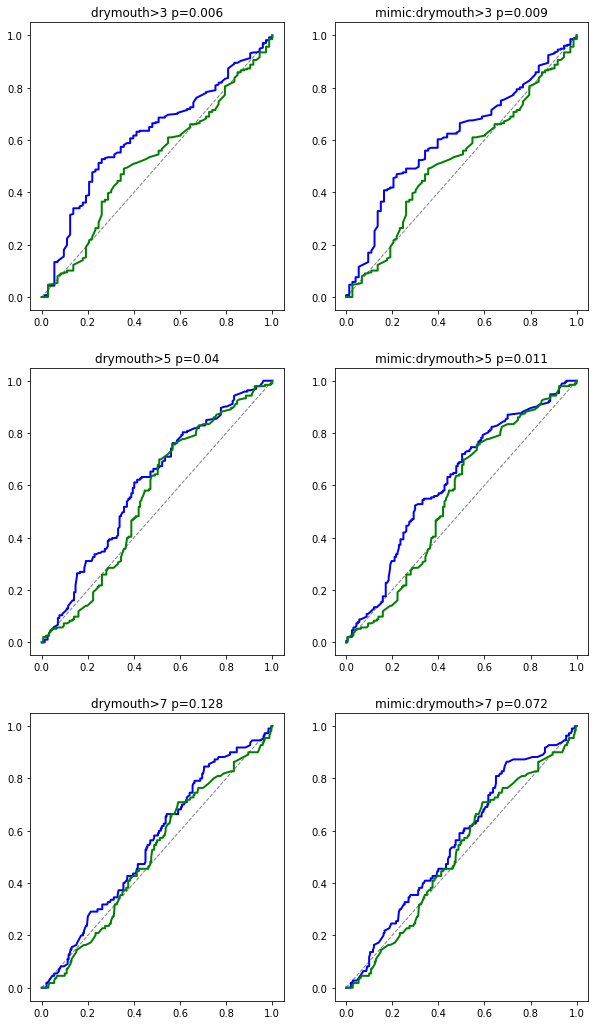

In [689]:
def plot_roc_curves(ct_list,thresholds=None,**kwargs):
    if thresholds is None:
        thresholds = [3,5,7]
    fix, axes = plt.subplots(len(thresholds),2*len(ct_list),figsize=(10*len(ct_list),6*len(thresholds)))
    for i, t in enumerate(thresholds):
        col = 0
        for c in ct_list:
            for mimic in [False,True]:
                y, y1, y0 = c.predict_cv(threshold=t,use_mimic=mimic,**kwargs)
                pval = np.round(delong(y.astype(int), y1[:,1], y0[:,1])[0][0],3)
                axis= axes[i,col]
                axis.plot([0,1],[0,1],color='grey',linestyle='dashed',linewidth=1)
                colors = ['blue','green']
                for iii, ycurr in enumerate([y1,y0]):
                    (fpr, tpr, thresholds) = roc_curve(y,ycurr[:,1])
                    axis.plot(fpr,tpr,color=colors[iii],linewidth=2)
                    title = ''.join(c.symptoms) + '>' + str(t) + ' p=' + str(pval)
                    if mimic:
                        title = 'mimic:' + title
                    axis.set_title(title)
                col += 1
    return axes

def plot_roc_sets(df,organs, symptomlists = None, model=None,**kwargs):
    if symptomlists is None:
        symptomlists = [
            ['drymouth'],
        ]
    cts = []
    for symptoms in symptomlists:
        ctester = ClusterTester(df,
                       organs,
                       symptoms=symptoms, 
                       **kwargs,
                      )
        cts.append(ctester)
    return plot_roc_curves(cts,model=model)

plot_roc_sets(sddf,ooi,
              n_clusters = 3,
              cluster_features= cfeatures,
             )

array([[<AxesSubplot:title={'center':'choke>3 p=0.102'}>,
        <AxesSubplot:title={'center':'mimic:choke>3 p=0.025'}>,
        <AxesSubplot:title={'center':'swallow>3 p=0.229'}>,
        <AxesSubplot:title={'center':'mimic:swallow>3 p=0.046'}>],
       [<AxesSubplot:title={'center':'choke>5 p=0.239'}>,
        <AxesSubplot:title={'center':'mimic:choke>5 p=0.286'}>,
        <AxesSubplot:title={'center':'swallow>5 p=0.08'}>,
        <AxesSubplot:title={'center':'mimic:swallow>5 p=0.55'}>],
       [<AxesSubplot:title={'center':'choke>7 p=0.056'}>,
        <AxesSubplot:title={'center':'mimic:choke>7 p=0.04'}>,
        <AxesSubplot:title={'center':'swallow>7 p=0.702'}>,
        <AxesSubplot:title={'center':'mimic:swallow>7 p=0.926'}>]],
      dtype=object)

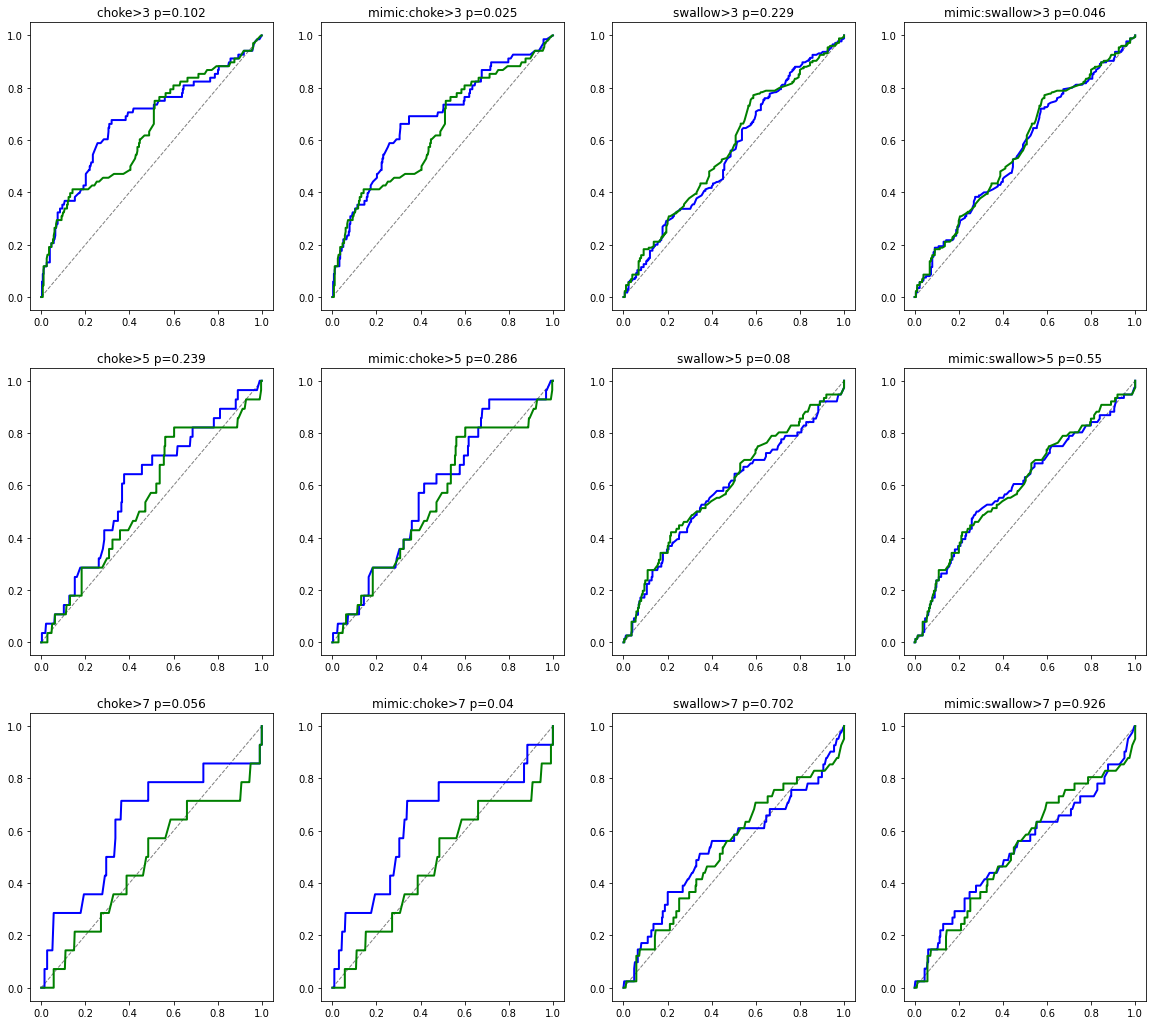

In [690]:
plot_roc_sets(sddf,choke_organs,
              symptomlists=[['choke'],['swallow']],
              n_clusters = 3,
              cluster_features= cfeatures,
             )

In [642]:
# plot_roc_sets(lstmdf,ooi,
#               n_clusters = 3,
#               cluster_features= cfeatures,
#              )
# plot_roc_sets(lstmdf2,ooi,
#               n_clusters = 3,
#               cluster_features= cfeatures,
#              )

In [664]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB

def test_cv_models(ct,key=None,confounders=None,models=None,include_mimic=True,include_delong=True):
    if models is None:
        models = [
            ComplementNB(),
            LogisticRegression(class_weight='balanced'),
            LogisticRegression(penalty='l1',solver='saga',class_weight='balanced'),
            LogisticRegression(penalty='elasticnet',l1_ratio=.5,solver='saga',class_weight='balanced'),
            RandomForestClassifier(n_estimators=500,class_weight='balanced',random_state=0),
            RandomForestClassifier(n_estimators=500,max_depth=3,random_state = 0),
            RandomForestClassifier(n_estimators=500,max_depth=3,class_weight='balanced',random_state = 0),
            RandomForestClassifier(n_estimators=500,max_depth=10,random_state = 0),
            RandomForestClassifier(n_estimators=500,max_depth=10,class_weight='balanced',random_state = 0),
        ]
    thresholds = [3,5,7]
    results = []
    if confounders is None:
        confounders = ct.default_confounders[:]
    for model in models:
        for t in thresholds:
            res = ct.get_cv_auc(threshold=t,model=model,confounders=confounders)
            if include_delong:
                res['delong_pval'] = ct.delong_roc(threshold=t,model=model,confounders=confounders)
            if include_mimic:
                res2 = ct.get_cv_auc(threshold=t,model=model,confounders=confounders,use_mimic=True)
                for k,v in res2.items():
                    res[k+'_mimic'] = v
                if include_delong:
                    res['delong_pval_mimic'] = ct.delong_roc(threshold=t,model=model,confounders=confounders,use_mimic=True)
            if key is not None:
                res['key'] = key
            res['threshold'] = t
            res['model'] = str(model)
            res['base_roc'] = res['roc'] - res['roc_change']
            results.append(res)
    return results

def best_model_df(c, metric='base_roc',**kwargs):
    return pd.DataFrame(test_cv_models(c,**kwargs)).sort_values([metric,'threshold'],kind='mergesort',ascending=False).groupby(['threshold',metric,'model']).first()

# best_model_df(ct)

In [650]:
best_model_df(choke_ct,
              confounders=choke_ct.default_confounders[:],
             )

roc  \
threshold base_roc model                                                          
3         0.606018 RandomForestClassifier(class_weight='balanced',...  0.658792   
          0.624557 RandomForestClassifier(class_weight='balanced',...  0.679521   
          0.629302 LogisticRegression(class_weight='balanced', l1_...  0.675402   
          0.631284 LogisticRegression(class_weight='balanced')         0.675454   
          0.633735 RandomForestClassifier(max_depth=10, n_estimato...  0.680147   
          0.635430 LogisticRegression(class_weight='balanced', pen...  0.672299   
          0.656785 RandomForestClassifier(max_depth=3, n_estimator...  0.688334   
          0.658766 RandomForestClassifier(class_weight='balanced',...  0.681503   
          0.673263 ComplementNB()                                      0.709976   
5         0.484749 RandomForestClassifier(class_weight='balanced',...  0.536990   
          0.504492 RandomForestClassifier(max_depth=10, n_estimato...  0.542868   
          0.516471 RandomForestClassifier(class_weight='balanced',...  0.532664   
          0.532831 LogisticRegression(class_weight='balanced', pen...  0.604370   
          0.542591 LogisticRegression(class_weight='balanced')         0.589840   
          0.577972 LogisticRegression(class_weight='balanced', l1_...  0.581300   
          0.583407 RandomForestClassifier(class_weight='balanced',...  0.620730   
          0.586180 RandomForestClassifier(max_depth=3, n_estimator...  0.599656   
          0.604592 ComplementNB()                                      0.671029   
7         0.395514 RandomForestClassifier(max_depth=10, n_estimato...  0.529762   
          0.411671 RandomForestClassifier(class_weight='balanced',...  0.458759   
          0.429741 RandomForestClassifier(class_weight='balanced',...  0.587798   
          0.464073 LogisticRegression(class_weight='balanced')         0.626276   
          0.466412 LogisticRegression(class_weight='balanced', pen...  0.556122   
          0.475872 RandomForestClassifier(max_depth=3, n_estimator...  0.609056   
          0.483312 RandomForestClassifier(class_weight='balanced',...  0.621173   
          0.513818 ComplementNB()                                      0.678571   
          0.535927 LogisticRegression(class_weight='balanced', l1_...  0.580782   

                                                                       roc_change  \
threshold base_roc model                                                            
3         0.606018 RandomForestClassifier(class_weight='balanced',...    0.052774   
          0.624557 RandomForestClassifier(class_weight='balanced',...    0.054965   
          0.629302 LogisticRegression(class_weight='balanced', l1_...    0.046099   
          0.631284 LogisticRegression(class_weight='balanced')           0.044170   
          0.633735 RandomForestClassifier(max_depth=10, n_estimato...    0.046412   
          0.635430 LogisticRegression(class_weight='balanced', pen...    0.036869   
          0.656785 RandomForestClassifier(max_depth=3, n_estimator...    0.031550   
          0.658766 RandomForestClassifier(class_weight='balanced',...    0.022737   
          0.673263 ComplementNB()                                        0.036713   
5         0.484749 RandomForestClassifier(class_weight='balanced',...    0.052240   
          0.504492 RandomForestClassifier(max_depth=10, n_estimato...    0.038376   
          0.516471 RandomForestClassifier(class_weight='balanced',...    0.016193   
          0.532831 LogisticRegression(class_weight='balanced', pen...    0.071539   
          0.542591 LogisticRegression(class_weight='balanced')           0.047249   
          0.577972 LogisticRegression(class_weight='balanced', l1_...    0.003327   
          0.583407 RandomForestClassifier(class_weight='balanced',...    0.037323   
          0.586180 RandomForestClassifier(max_depth=3, n_estimator...    0.013476   
          0.604592 ComplementNB()                    

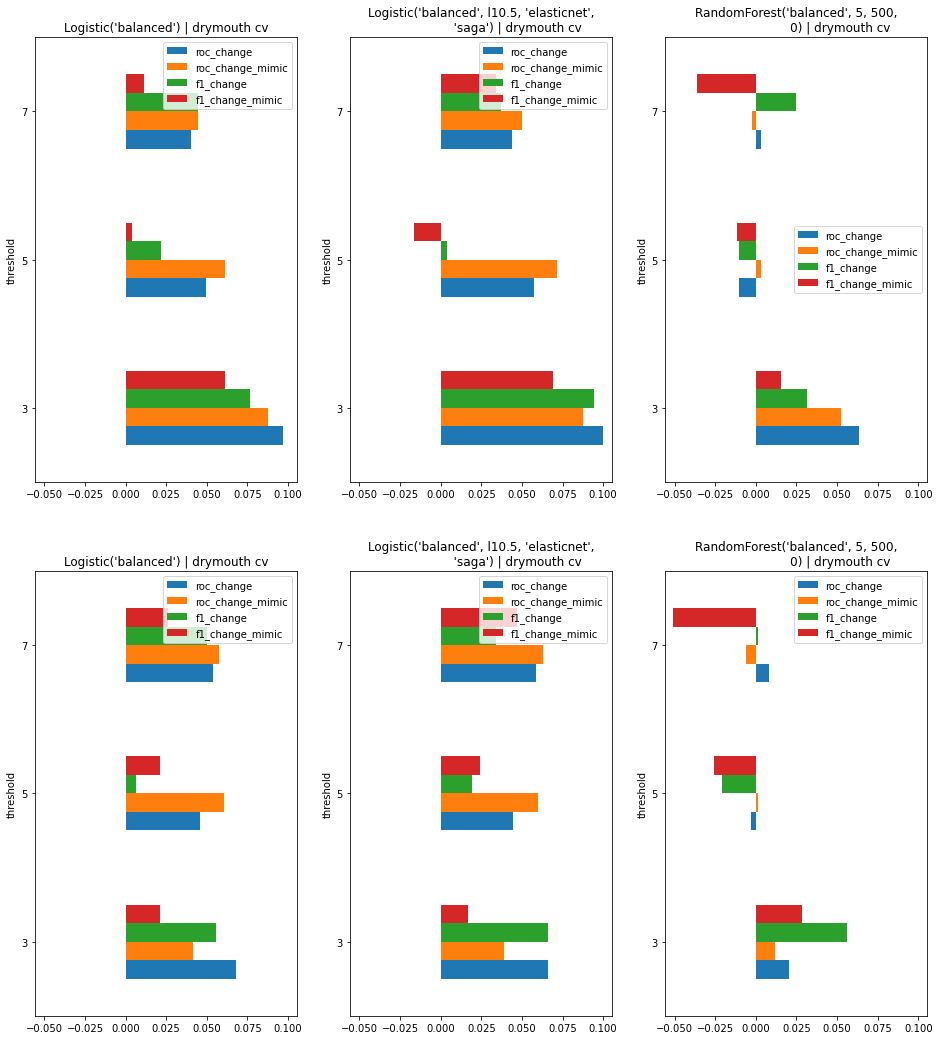

In [693]:
def plot_best_models(results,basetitle='drymouth cv'):
    dfs = [pd.DataFrame(res) for res in results]
    #I assume these all have the same set of models
    n_models = len(dfs[0].model.unique())
    n_rows = len(dfs)
    fig,axes = plt.subplots(n_rows,n_models,figsize=(8*n_rows,6*n_models))
    ymin = 0
    ymax = 0
    def format_model(m):
        m = str(m).replace('Regression','').replace("Classifier",'')
        m = re.sub(r'[a-zA-z]+\=', '', m)
        return m
    for row, df in enumerate(dfs):
        col=0
        for model, subdf in df.groupby('model'):
            axis = axes[row,col]
            subdf.plot(kind='barh',x='threshold',y=['roc_change','roc_change_mimic','f1_change','f1_change_mimic'],ax=axis)
            col+=1
            (min_y, max_y) = axis.get_xlim()
            ymin = min(min_y,ymin)
            ymax = max(max_y,ymax)
            axis.set_title(format_model(model) + ' | ' + basetitle)
    [[ax.set_xlim((ymin,ymax)) for ax in row] for row in axes]
            
models=[
    LogisticRegression(class_weight='balanced'),
    RandomForestClassifier(n_estimators = 500, max_depth=5,class_weight='balanced',random_state=0),
    LogisticRegression(penalty='elasticnet',l1_ratio=.5,solver='saga',class_weight='balanced'),
]

test = test_cv_models(ct,
                      models=models,
                     )
# ltest = test_cv_models(lstm_ct,
#                        models=models,
#                      )
ltest2 = test_cv_models(lstm_ct2,
                       models=models,
                     )
plot_best_models([test,ltest2])

<AxesSubplot:ylabel='symptoms,threshold,n_clusters,features'>

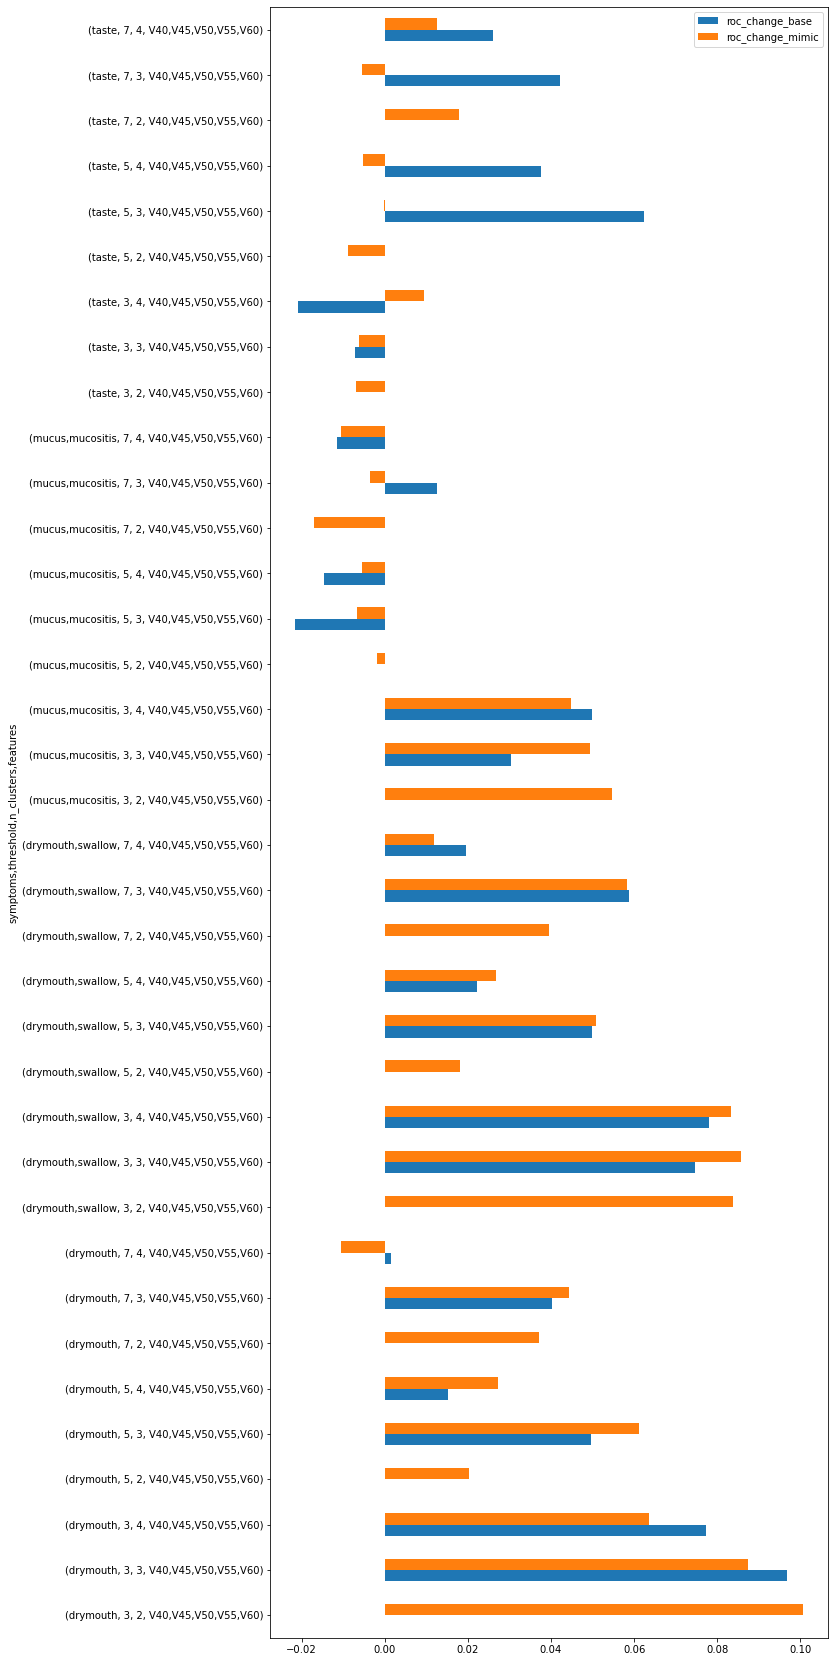

In [700]:
def get_mimic_cv_results(df):
    organ_lists = [
        [
#             'Tongue',
            'Genioglossus_M',
#             'Mylogeniohyoid_M',
            'Rt_Parotid_Gland','Lt_Parotid_Gland',
            'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
        ],
#         [
#             'Mylogeniohyoid_M',
#             'Rt_Parotid_Gland','Lt_Parotid_Gland',
#             'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#         ],
#         [
#             'Rt_Parotid_Gland','Lt_Parotid_Gland',
#             'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#         ],
    ]
    confounder_lists = [
#         ['t4','t3','n_severe','hpv'],
#         ['t4','t3','n_severe','hpv','Parotid_Gland_limit'],
        ['t4','t3','n2','n3','hpv','BOT','Tonsil','Parotid_Gland_limit'],
#         ['t4','t3','n_severe','hpv','BOT','Tonsil','Parotid_Gland_limit','Esophagus_limit'],
    ]
    symptom_lists = [
        ['drymouth'],
#         ['swallow'],
        ['taste'],
#         ['teeth'],
#         ['choke'],
#         ['sob'],
#         ['voice'],
#         ['nausea','vomit'],
        ['drymouth','swallow'],
        ['mucus','mucositis'],
    ]

    feature_lists = [
        ['V40','V45','V50','V55','V60'],
#         ['V35','V40','V45','V50'],
#         ['V40','V45','V50','V55'],
    ]
    
    thresholds = [3,5,7]
    cluster_sizes = [
        2,
        3,
        4,
    ]
    
    models = [
        LogisticRegression(class_weight='balanced'),
#         RandomForestClassifier(max_depth=3,class_weight='balanced'),
    ]
    n_runs = np.prod([len(l) for l in [organ_lists,confounder_lists,symptom_lists,feature_lists,thresholds,cluster_sizes,models]])
    i = 1
    result_list = []
    for organs in organ_lists:
        for symptoms in symptom_lists:
            for features in feature_lists:
                for n in cluster_sizes:
                    ct = ClusterTester(df,
                                       organs,
                                       n_clusters=n,
                                       cluster_features = features,
                                       symptoms=symptoms,
                                      )
                    #pre-compute mimic model results
                    ct.get_cluster_df(use_mimic=True)
                    for confounders in confounder_lists:
                        for model in models:
                            for threshold in thresholds:
                                base_results = ct.get_cv_auc(threshold=threshold,
                                                             model=model,
                                                             use_mimic = False,
                                                             confounders=confounders)
                                mimic_results = ct.get_cv_auc(threshold=threshold,
                                                             model=model,
                                                             use_mimic = True,
                                                             confounders=confounders)
                                entry = {
                                    'organs': organs,
                                    'symptoms': symptoms,
                                    'features': features,
                                    'n_clusters': n,
                                    'confounders': confounders,
                                    'model': model,
                                    'threshold': threshold,
                                }
                                print('_____',np.round(100*i/n_runs,2),'%_______')
                                print(entry)
                                for k,v in base_results.items():
                                    mr = mimic_results.get(k)
                                    entry[k+'_base'] = v
                                    entry[k+'_mimic'] = mr
                                    if k.replace('_change','') in ['roc','mcc','f1']:
                                        print('base '+k,v,'mimic '+k,mr)
                                result_list.append(entry)
                                print('___________')
                                print()
                                i += 1
    return result_list

def format_cv_results(results):
    laucdf = pd.DataFrame(results).sort_values('roc_change_mimic')
    groups = ['symptoms','threshold','n_clusters','organs','features','confounders']
    for col in ['organs','symptoms','features','confounders']:
        laucdf[col] = laucdf[col].apply(lambda x: ','.join(x))
    for c in groups:
        if len(laucdf[c].unique()) < 2:
            groups.remove(c)
    return laucdf.groupby(groups).first()

# cvtest = get_mimic_cv_results(sddf)
# format_cv_results(cvtest).to_csv(Const.data_dir+'base_organ_cv_test_results_'+timestamp()+'.csv')
format_cv_results(cvtest).plot(kind='barh',y=['roc_change_base','roc_change_mimic'],figsize=(10,30))

organs  symptoms  \
0  Genioglossus_M,Rt_Parotid_Gland,Lt_Parotid_Gla...  drymouth   
1  Genioglossus_M,Rt_Parotid_Gland,Lt_Parotid_Gla...  drymouth   
2  Genioglossus_M,Rt_Parotid_Gland,Lt_Parotid_Gla...  drymouth   
3  Genioglossus_M,Rt_Parotid_Gland,Lt_Parotid_Gla...  drymouth   
4  Genioglossus_M,Rt_Parotid_Gland,Lt_Parotid_Gla...  drymouth   
5  Genioglossus_M,Rt_Parotid_Gland,Lt_Parotid_Gla...  drymouth   
6  Genioglossus_M,Rt_Parotid_Gland,Lt_Parotid_Gla...  drymouth   
7  Genioglossus_M,Rt_Parotid_Gland,Lt_Parotid_Gla...  drymouth   
8  Genioglossus_M,Rt_Parotid_Gland,Lt_Parotid_Gla...  drymouth   

              features  n_clusters  \
0  V40,V45,V50,V55,V60           2   
1  V40,V45,V50,V55,V60           2   
2  V40,V45,V50,V55,V60           2   
3  V40,V45,V50,V55,V60           3   
4  V40,V45,V50,V55,V60           3   
5  V40,V45,V50,V55,V60           3   
6  V40,V45,V50,V55,V60           4   
7  V40,V45,V50,V55,V60           4   
8  V40,V45,V50,V55,V60           4   

                                      confounders  \
0  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit   
1  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit   
2  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit   
3  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit   
4  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit   
5  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit   
6  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit   
7  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit   
8  t4,t3,n2,n3,hpv,BOT,Tonsil,Parotid_Gland_limit   

                                         model  threshold  roc_base  \
0  LogisticRegression(class_weight='balanced')          3  0.521191   
1  LogisticRegression(class_weight='balanced')          5  0.555526   
2  LogisticRegression(class_weight='balanced')          7  0.513693   
3  LogisticRegression(class_weight='balanced')          3  0.617947   
4  LogisticRegression(class_weight='balanced')          5  0.605079   
5  LogisticRegression(class_weight='balanced')          7  0.553864   
6  LogisticRegression(class_weight='balanced')          3  0.598536   
7  LogisticRegression(class_weight='balanced')          5  0.570625   
8  LogisticRegression(class_weight='balanced')          7  0.515303   

   roc_mimic  roc_change_base  ...  f1_change_base  f1_change_mimic  \
0   0.621755         0.000000  ...        0.000000         0.105753   
1   0.575889         0.000000  ...        0.000000         0.060923   
2   0.550739         0.000000  ...        0.000000         0.051786   
3   0.608649         0.096756  ...        0.076755         0.061435   
4   0.616811         0.049553  ...        0.021915         0.003882   
5   0.558068         0.040170  ...        0.044757         0.011331   
6   0.584714         0.077345  ...        0.048697        -0.019378   
7   0.582654         0.015099  ...        0.005655        -0.067929   
8   0.503258         0.001610  ...       -0.021818         0.013123   

   f_half_base  f_half_mimic  f_half_change_base  f_half_change_mimic  \
0     0.736677      0.804133            0.000000             0.067456   
1     0.608604      0.638200            0.000000             0.029596   
2     0.337662      0.367483            0.000000             0.029821   
3     0.789972      0.778098            0.053295             0.041421   
4     0.637838      0.621592            0.029233             0.012988   
5     0.375318      0.352304            0.037656             0.014641   
6     0.767736      0.731573            0.031059            -0.005104   
7     0.611399      0.565371            0.002795            -0.043233   
8     0.318182      0.348837           -0.019481             0.011175   

    f2_base  f2_mimic  f2_change_base  f2_change_mimic  
0  0.551643  0.679575        0.000000         0.127932  
1  0.602911  0.697791        0.000000         0.094881  
2  0.429752  0.518053        0.000000         0.088301  
3  0.640829  0.623557        0.089186         0.071913  
4  0.617801  0.598111        0.0148

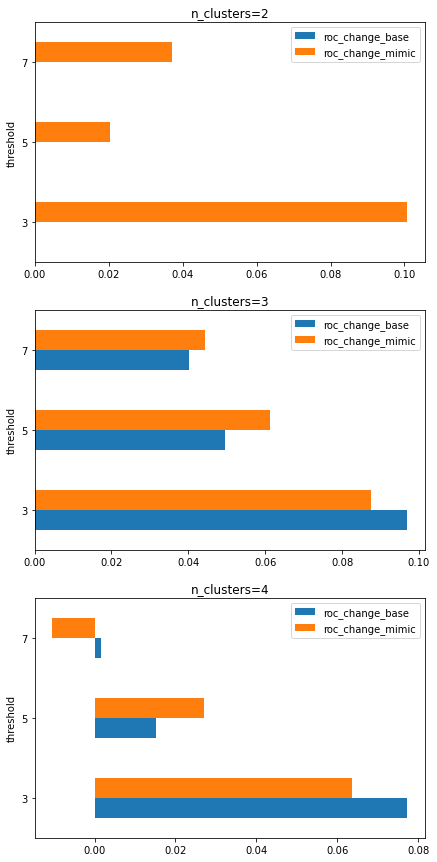

In [713]:
def plot_cvtest(cvtest,y=['roc_change_base','roc_change_mimic'],rowcol='n_clusters',x='threshold',**kwargs):
    df = pd.DataFrame(cvtest)
    for col in ['organs','symptoms','features','confounders']:
        df[col] = df[col].apply(lambda x: ','.join(x))
    for key, value in kwargs.items():
        if key in df.columns:
            df = df[df[key] == value]
    nrows = len(df[rowcol].unique())
    fig,axes = plt.subplots(nrows,1,figsize=(7,5*nrows))
    rowpos = 0
    for row,subdf in df.groupby(rowcol):
        axis = axes[rowpos]
        axis.set_title(rowcol+'='+str(row))
        subdf[y+[x]].plot(kind='barh',y=y,x=x,ax=axis)
        rowpos += 1
    return df
plot_cvtest(cvtest,symptoms='drymouth')

In [695]:
# ltest = get_mimic_cv_results(lstmdf)
# format_cv_results(ltest).to_csv(Const.data_dir+'lstm_organ_cv_test_results_'+timestamp()+'.csv')
# format_cv_results(ltest)

<AxesSubplot:ylabel='threshold,organs,confounders'>

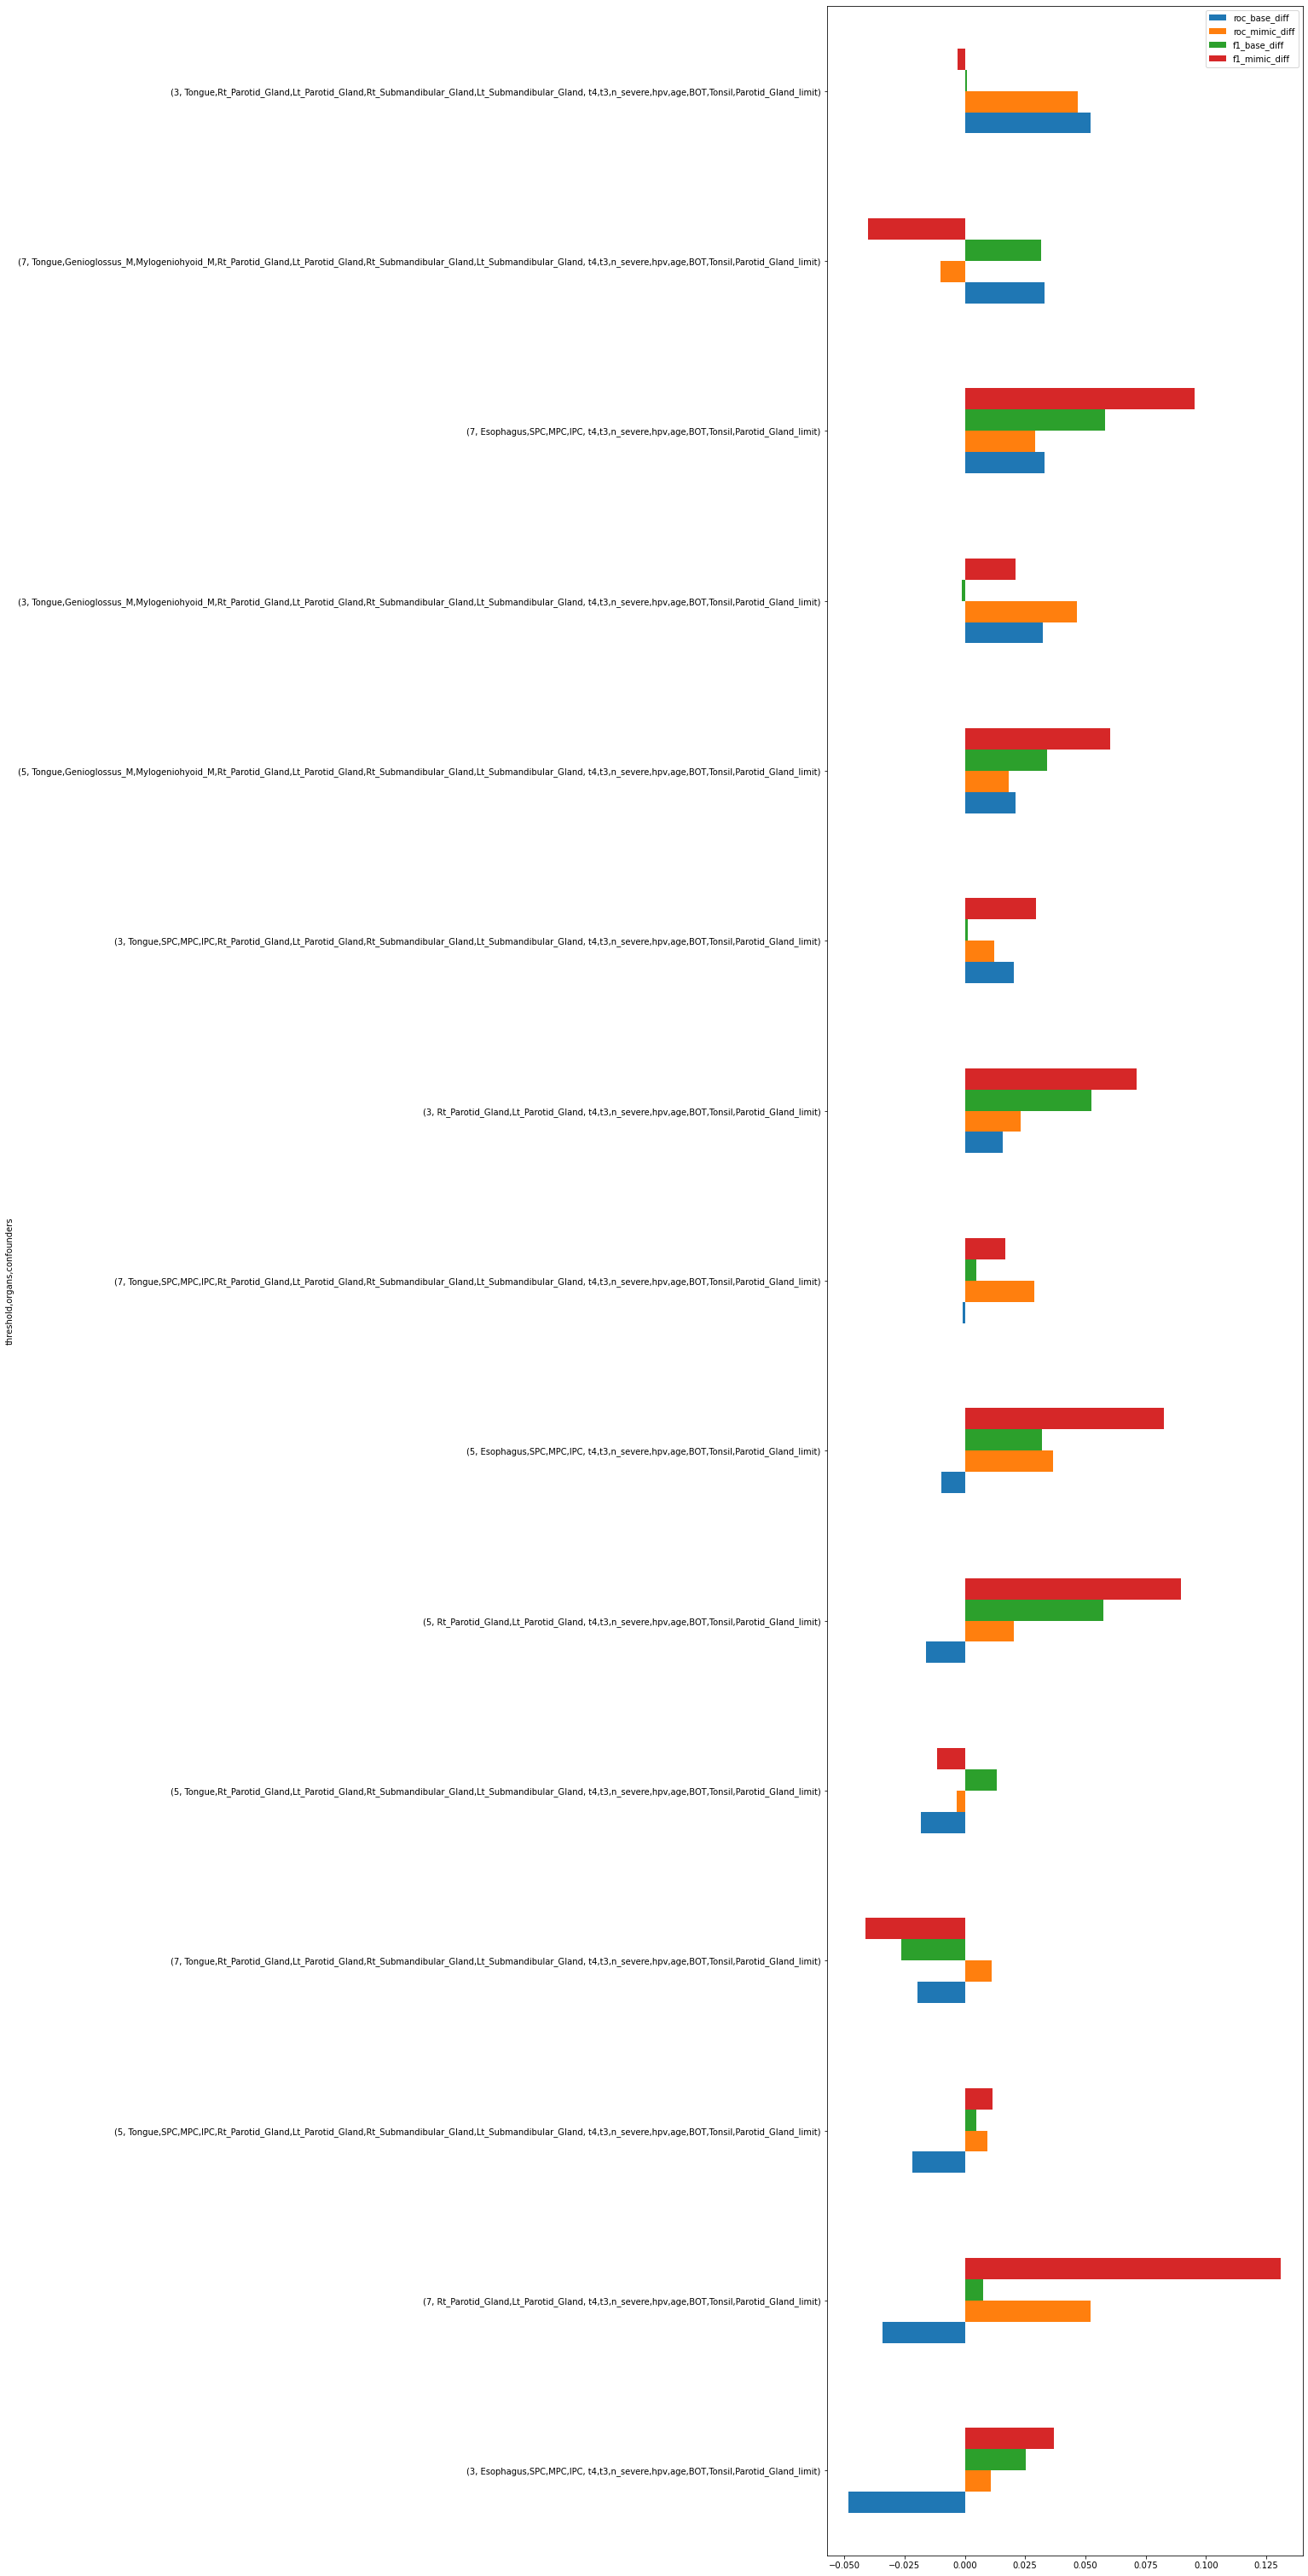

In [364]:
def compare_cv_results(r1,r2):
    #I don't know how to double check sorting so just hope that works
    t1 = format_cv_results(r1)
    t2 = format_cv_results(r2)
    t3 = t1.copy()
    to_drop = []
    for col in t1.columns:
        if '_mimic' in col or '_base' in col:
            t3[col+'_diff'] = t1[col] - t2[col]
            to_drop.append(col)
    t3 = t3.drop(to_drop,axis=1)
    return t3
    
# comptest = compare_cv_results(test,ltest)
toplot = ['roc_base_diff','roc_mimic_diff','f1_base_diff','f1_mimic_diff']
comptest.loc['drymouth'].sort_values(toplot).drop(['features'],axis=1).plot(kind='barh',y=toplot,figsize=(10,55))

In [86]:
def test_cluster_aucs(df, organlist, symptomlist, 
                      agg_type='mean',#default otherwise is max
                      cluster_sizes = None, 
                      use_mimic=False,
                      featurelist = None, 
                      thresholds=None, 
                      **kwargs):
    results = []
    if cluster_sizes is None:
        cluster_sizes = [2,3,4]
    if thresholds is None:
        thresholds = [3,5,7]
    if featurelist is None:
        featurelist = [
            ['V35','V40','V45','V50','V55'],
            ['V35','V40','V45','V50','V55','V60'],
        ]
    n_runs = 2*len(cluster_sizes)*len(thresholds)*len(organlist)*len(symptomlist)*len(featurelist)
    i=1
    for use_end_cluster in [False,True]:
        for n in cluster_sizes:
            #this flag will only look at the effect of the clustre with the highest dose
            if use_mimic:
                cluster = None
            if not use_mimic and use_end_cluster:
                cluster = n-1
            for thold in thresholds:
                for organs in organlist:
                    for symptoms in symptomlist:
                        for features in featurelist:
                            ct = ClusterTester(df,organs,
                                               symptoms=symptoms,
                                               cluster_features=features,
                                               n_clusters=n,
                                               agg_type=agg_type,
                                               **kwargs)
                            metrics = ct.get_cv_auc(
                                threshold=thold,
                                use_mimic=use_mimic,
                                cluster=cluster
                            )
                            metrics['threshold'] = thold
                            metrics['n_clusters'] = n
                            metrics['symptoms'] = symptoms
                            metrics['organs'] = organs
                            metrics['features']=features
                            metrics['use_end_cluster'] = use_end_cluster
                            print(str(np.round(100*i/n_runs,1)) + '%',end='\r')
                            results.append(metrics)
                            i+=1
    return pd.DataFrame(results)

def plot_auc_results(df,
                     x='n_clusters',
                     y='roc_change',
                     hue='organs',
                     col='threshold',
                     row='symptoms',
                     threshold=None,
                     organs=None,
                     n_clusters=None,
                     symptoms=None,
                     features=None,
                     use_end_cluster=None,
                     kind='bar',
                    ):
    df = df.copy()
    if threshold is not None:
        df = df[df.threshold == threshold]
    if n_clusters is not None:
        df = df[df.n_clusters == n_clusters]
    if use_end_cluster is not None:
        df = df[df.n_clusters == use_end_cluster]
    def make_name(xlist):
        def fix(x):
            for symbol in ['t_','_','\[','\]',"\'"]:
                x = x.replace(symbol,'')
            return x[:2] + x[len(x)-2:]
        xlist = [fix(x) for x in xlist]
        xlist 
    make_name = lambda xlist: '\n'.join([x.replace('_','').replace('\[','').replace('\]','').replace("\'",'')[:2] + x[len(x)-2:] for x in xlist])
    
    df.symptoms = df.symptoms.apply(make_name)
    df.organs = df.organs.apply(make_name)
    df.features = df.features.apply(make_name)
    if symptoms is not None:
        df = df[df.symptoms == make_name(symptoms)]
        
    if organs is not None:
        df = df[df.organs  == make_name(organs)]
    
    if features is not None:
        df = df[df.features == make_name(features)]
    df['combined_name'] = df.organs + '|' + df.features
    
    g=sns.catplot(
        data=df,
        x=x,
        y=y,
        col=col,
        row=row,
        kind=kind,
        hue=hue,
    )
    print('_____________')
    return 

alt_oois = [
    ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
     'Rt_Parotid_Gland','Lt_Parotid_Gland',
     'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
      ],
#     ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
#      'Rt_Parotid_Gland','Lt_Parotid_Gland',
#      'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#      'Extended_Oral_Cavity',
#       ],
#     ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
#      'Rt_Parotid_Gland','Lt_Parotid_Gland',
#      'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#      'Rt_Ant_Digastric_M','Lt_Ant_Digastric_M',
#       ],
#     ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
#      'Rt_Parotid_Gland','Lt_Parotid_Gland',
#      'Rt_Submandibular_Gland','Lt_Submandibular_Gland',
#      'Rt_Ant_Digastric_M','Lt_Ant_Digastric_M',
#       'Extended_Oral_Cavity',
#     ],
]
temp_slist = [
    ['drymouth'],
    ['swallow'],
    ['taste'],
    ['teeth'],
    ['choke'],
    ['sob'],
    ['voice'],
    ['nausea','vomit'],
    ['drymouth','swallow'],
    ['mucus','mucositis'],
]

featurelists=[
    ['V35','V40','V45','V50','V55'],
    ['V35','V40','V45','V50'],
    ['V35','V40','V45'],
    ['V40','V45','V50','V55'],
]
# test = test_cluster_aucs(sddf, 
#                          alt_oois, 
#                          symptomlist = temp_slist,
#                          featurelist=featurelists,
#                         )
# filename = Const.data_dir+'model_test_'+timestamp()+'.csv'
# test.to_csv(filename)
test = pd.read_csv(Const.data_dir + 'model_test_202204160555598927.csv')
test['ostring'] = test.organs.apply(lambda x: '|'.join([xx[:7] for xx in x[5:]]))
for m in ['f2','mcc','roc']:
    print('_________')
    print(test[(test.use_end_cluster) & test.symptoms.apply(lambda x: 'drymouth' in x)].sort_values(m+'_change',ascending=False).loc[:,['symptoms','features','ostring',m+'_change',m,'n_clusters']].iloc[0:3,:].T)

_________
                                                         3605  \
symptoms                                         ['drymouth']   
features                                 ['D2', 'D50', 'D99']   
ostring     g|u|e|'|,| |'|G|e|n|i|o|g|l|o|s|s|u|s|_|M|'|,|...   
f2_change                                            0.363022   
f2                                                   0.712121   
n_clusters                                                  2   

                                                         5858  \
symptoms                                         ['drymouth']   
features                          ['D2', 'D10', 'D20', 'D30']   
ostring     g|u|e|'|,| |'|G|e|n|i|o|g|l|o|s|s|u|s|_|M|'|,|...   
f2_change                                            0.360871   
f2                                                    0.70997   
n_clusters                                                  4   

                                                         5768  
symptoms      

_____________


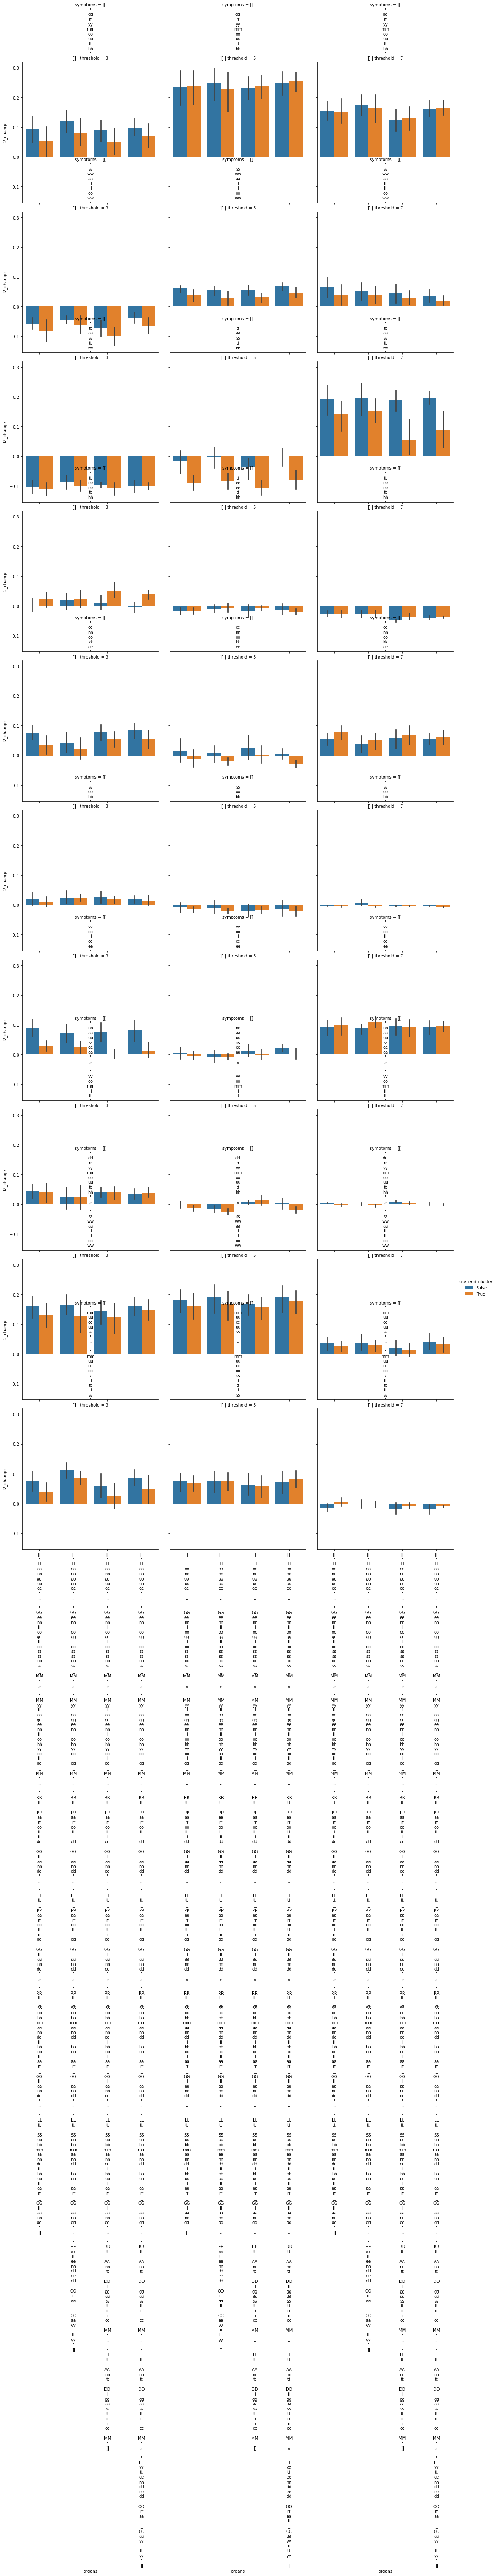

In [87]:
plot_auc_results(test,y='f2_change',hue='use_end_cluster',n_clusters=4,x='organs')

In [ ]:
plot_auc_results(test,y='mcc_change',hue='use_end_cluster',x='organs')

In [ ]:
plot_auc_results(test,y='roc_change',hue='use_end_cluster',x='organs') 

In [ ]:
res = ct.get_ate(n_iters=50,confounder_pval_filter=1,use_dose_confounders=False)
res.sort_values('dr_ate_05',ascending=False)

In [ ]:
# lstm_ct.get_ate(n_iters=1,use_mimic=True)
# ct.get_ate(n_iters=1,confounder_pval_filter=.5,use_dose_confounders=False,use_mimic=True)
# ct.get_ate(n_iters=1,confounder_pval_filter=.5,use_dose_confounders=False)

In [ ]:
get_demographics_table(sddf)

In [ ]:
def run_ate_grid_search(savepath = None):
    if savepath is None:
        savepath = Const.data_dir+'cluster_ate_results_' + timestamp + '.csv'
    organs_of_interest_list = [
        ['Tongue','Genioglossus_M',
         'Rt_Parotid_Gland','Lt_Parotid_Gland',
         'Rt_Submandibular_Gland','Lt_Submandibular_Gland'],
        ['Tongue','Genioglossus_M','Mylogeniohyoid_M',
         'Rt_Parotid_Gland','Lt_Parotid_Gland',
         'Rt_Submandibular_Gland','Lt_Submandibular_Gland'],
    ]
    symptomlist = [
        ['drymouth'],
        ['taste'],
        ['voice'],
        ['nausea'],
        ['choke'],
        ['mucus'],
        ['teeth'],
        ['drymouth','voice','taste','teeth'],
        ['choke','nausea']
    ]
    results = []
    for symptoms in symptomlist:
        for organs_of_interest in organs_of_interest_list:
            try:
                ct = ClusterTester(sddf,organs_of_interest,symptoms=symptoms)
                ate_base = ct.get_ate(n_iters=50,confounder_pval_filter = 1, use_dose_confounders=False)
                ate_alt = ct.get_ate(n_iters=50)
                ate_base['symptoms'] = '_'.join(symptoms)
                ate_alt['symptoms'] = '_'.join(symptoms)
                ate_alt['use_dose'] = False
                ate_base['use_dose'] = True
                ate_alt['organs'] = organs
                ate_base['organs'] = organs
                results.append(ate_base)
                results.append(ate_alt)
                temp = pd.concat(results,axis=0,ignore_index=True)
                temp.to_csv(savepath)
                print(temp.sort_values('dr_ate_05',ascending=False).head())
            except Exception as e:
                print(e)
    return pd.concat(results,axis=0,ignore_index=True)